# Project Name = Loan Data Analysis for Better Leading decisions

# Dataset- Loan_Credit Dataset

Link= https://github.com/humbertobasurto/Loan_data/blob/master/credit_train.csv

https://www.kaggle.com/datasets/faridaelhusseinyy/credit-train/data?select=credit_train.csv

# Problem Satement

The "Loan Data Analysis for Better Lending Decisions" project aims to leverage advanced analytics
and machine learning techniques to enhance the decision-making processes in the lending industry.
By analyzing a comprehensive dataset related to loan applications, the project seeks to uncover
patterns, identify risk factors, and optimize lending strategies. The overarching goal is to improve the
accuracy of predicting loan defaults, streamline approval processes, and ultimately contribute to the
financial health of lending institutions.

# Dataset Description 

Loan ID -Unique Loan identification number 

Customer ID- Unique Loan identification number

Loan Status- Fully Paid/Charged Off

Current Loan Amount- Total amount of money that the borrower currently owes on loans. A high current loan amount can indicate that the borrower is already struggling to repay their debts, which could make them more likely to default on future loans.

Term- Short Term/ Long Term

Credit Score- 3 Digit score given to an individual based on his creditworthiness

Annual Income- Total compensation of a person per year

Years in current job- Number of years the person is in the job market.

Home Ownership- Home Mortgage/ Own Home, Rent

Purpose- Purpose of the person taking the loan

Monthly Debt- Amount the person owes to the bank every month

Years of Credit History- Number of years since the person’s first credit record

Months since last delinquent- length of time since a borrower has made a late payment on a loan or credit card. 

Number of Credit Problems- The number of problems the bank has identified with the person’s credit history

Current Credit Balance- It is the total amount of money that the borrower currently owes on all of their credit accounts.

Maximum Open Credit- Total amount of credit that the borrower has available to them. 

Bankruptcies- The number of times the person has failed to pay their debt.

Tax Liens- A tax lien is a legal claim against a property that occurs when the property's owner fails to pay taxes owed to the            government.

# Dependent variables
Loan Status





# Independent categorical variables:

Term

Home Ownership

Purpose

Years in Current Job

# Independent numerical variables:

Current Loan Amount

Credit Score

Annual Income

Monthly Debt

Years of Credit History

Months since last delinquent

Number of Open Accounts

Number of Credit Problems

Current Credit Balance

Maximum Open Credit

Bankruptcies

Tax Liens


# Irrelevant variables:

Loan ID

Customer ID

# 1. Import Libraries

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cbook import boxplot_stats

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

from scipy.stats import shapiro

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan


from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV


print("Libraries Imported")

Libraries Imported


# 2. Set Options

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

This settings ensures that Pandas will display all columns and rows of a DataFrame when printed. and print output values upto 6 decimals

# 3. Read Data

In [4]:
# read csv file using pandas
df = pd.read_csv("Loan.csv")

# display the top 5 rows of the dataframe
df.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid        445412.000000  Short Term    709.000000 1167493.000000   
1  Fully Paid        262328.000000  Short Term           NaN            NaN   
2  Fully Paid      99999999.000000  Short Term    741.000000 2231892.000000   
3  Fully Paid        347666.000000   Long Term    721.000000  806949.000000   
4  Fully Paid        176220.000000  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements   5214.740000   
1            10+ years  Home Mortgage  Debt Consolidation  33295.980000   
2              8 years       Own Home  Debt Consolidation  29200.530000   
3              3 years       Own Home  Debt Consolidation   8741.900000   
4              5 years           Rent  Debt Consolidation  20639.700000   

   Years of Credit History  Months since last delinquent  \
0                17.200000                           NaN   
1                21.100000                      8.000000   
2                14.900000                     29.000000   
3                12.000000                           NaN   
4                 6.100000                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 6.000000                   1.000000           228190.000000   
1                35.000000                   0.000000           229976.000000   
2                18.000000                   1.000000           297996.000000   
3                 9.000000                   0.000000           256329.000000   
4                15.000000                   0.000000           253460.000000   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0        416746.000000      1.000000   0.000000  
1        850784.000000      0.000000   0.000000  
2        750090.000000      0.000000   0.000000  
3        386958.000000      0.000000   0.000000  
4        427174.000000      0.000000   0.000000

1. pd.read_csv("Loan.csv"): Pandas' read_csv function is used to read data from a CSV file named "Loan_Dataset.csv" and store it in a DataFrame called df. This assumes that the CSV file is in the current working directory.
    
2. df.head(): This method is used to display the first 5 rows of the DataFrame df. It provides a quick glimpse of the dataset

# 4. Data Analysis and Preparation

### Data preparation is the process of cleaning and transforming raw data prior to building predictive models. 
                        Here we will analyze and prepare data to perform regression analysis:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <Br>
                        2. Check the data types. Refer data definition to ensure your data types are correct  <br>
                        3. If data types are not as per business context, change the data types as per requirement <br>
                        4. Study summary statistics<br>
                        5. Check for missing values<br>
                        6. Study correlation<br>
                        7. Analyze categorical variables<br>
                        8. Analyze relationship between target variable and categorical variables<br>
                        9. Perform feature engineering<br>
                       10. Detect outliers<br>
                       11. Recheck the correlation<br><br>
               Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.

## 4.1 Understand the Dataset

### 4.1.1 Data Dimension

In [5]:
#The df.shape attribute is used to get the dimensions of the DataFrame df. 
#It returns a tuple representing the number of rows and columns in the DataFrame. 
df.shape

(100514, 19)

### 1.Column Names and Data Types:

Your DataFrame has 19 columns, each with a specific data type (object or float64).
Columns like "Loan ID," "Customer ID," "Loan Status," "Term," "Years in current job," "Home Ownership," and "Purpose" are of type object, which typically represents categorical or string data.
Columns such as "Current Loan Amount," "Credit Score," "Annual Income," etc., are of type float64, indicating numerical data.

### 2.Number of Non-Null Entries:

The total number of entries is 100,000 for all columns, suggesting that the DataFrame has 100,000 rows of data.
Certain columns have fewer than 100,000 non-null entries, indicating the presence of missing values.

In [6]:
#The df.info() method provides a concise summary of the DataFrame df. 
#It includes information such as the data types of each column, the number of non-null values, and memory usage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [8]:
# use .astype() to change the data type

df['Loan Status'] = df['Loan Status'] .astype('category')

df.Term = df.Term.astype('category')

df['Years in current job'] = df['Years in current job'].astype('category')

df['Home Ownership'] = df['Home Ownership'].astype('category')

df['Purpose'] = df['Purpose'].astype('category')

By converting these columns to categorical types, we are not only potentially save memory but also convey to the analysis tools that these columns represent discrete categories rather than continuous numerical values. This can enhance the interpretability of the data and facilitate better visualization and analysis.

In [9]:
# Recheck the data types after the conversion
df.dtypes

Loan ID                           object
Customer ID                       object
Loan Status                     category
Current Loan Amount              float64
Term                            category
Credit Score                     float64
Annual Income                    float64
Years in current job            category
Home Ownership                  category
Purpose                         category
Monthly Debt                     float64
Years of Credit History          float64
Months since last delinquent     float64
Number of Open Accounts          float64
Number of Credit Problems        float64
Current Credit Balance           float64
Maximum Open Credit              float64
Bankruptcies                     float64
Tax Liens                        float64
dtype: object

In [10]:
# Drop Irrelevant variables: Loan ID & Customer ID

df.drop(["Loan ID","Customer ID"],axis=1, inplace = True)


"Loan ID" and "Customer ID" are typically unique identifiers and they not provide meaningful information for analysis or modeling. Dropping them indicates a focus on features that are more relevant to the analysis task.

In [11]:
df.duplicated().sum()

10728

The result is 10728, which means there are 10,728 rows in the DataFrame 

In [12]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
df_num=df.select_dtypes("number")

<AxesSubplot:>

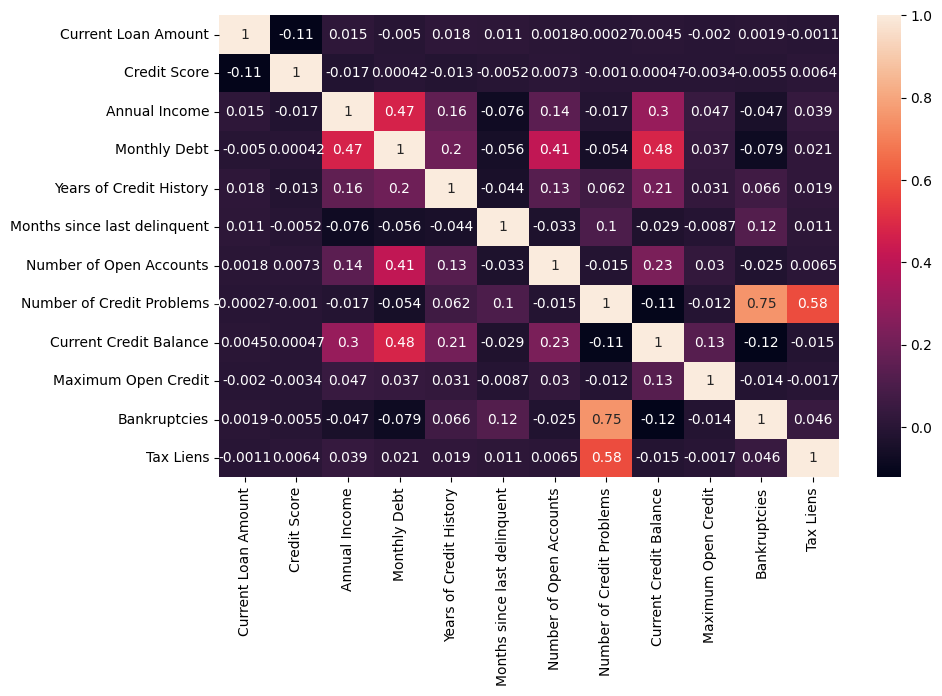

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot= True, cbar= True)

Duplicates can arise due to errors in data collection, data entry, or data merging processes. Eliminating duplicates improves the overall quality of the dataset.

# Dealing With Columns

In [15]:
df.head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid        445412.000000  Short Term    709.000000 1167493.000000   
1  Fully Paid        262328.000000  Short Term           NaN            NaN   
2  Fully Paid      99999999.000000  Short Term    741.000000 2231892.000000   
3  Fully Paid        347666.000000   Long Term    721.000000  806949.000000   
4  Fully Paid        176220.000000  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements   5214.740000   
1            10+ years  Home Mortgage  Debt Consolidation  33295.980000   
2              8 years       Own Home  Debt Consolidation  29200.530000   
3              3 years       Own Home  Debt Consolidation   8741.900000   
4              5 years           Rent  Debt Consolidation  20639.700000   

   Years of Credit History  Months since last delinquent  \
0                17.200000                           NaN   
1                21.100000                      8.000000   
2                14.900000                     29.000000   
3                12.000000                           NaN   
4                 6.100000                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 6.000000                   1.000000           228190.000000   
1                35.000000                   0.000000           229976.000000   
2                18.000000                   1.000000           297996.000000   
3                 9.000000                   0.000000           256329.000000   
4                15.000000                   0.000000           253460.000000   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0        416746.000000      1.000000   0.000000  
1        850784.000000      0.000000   0.000000  
2        750090.000000      0.000000   0.000000  
3        386958.000000      0.000000   0.000000  
4        427174.000000      0.000000   0.000000

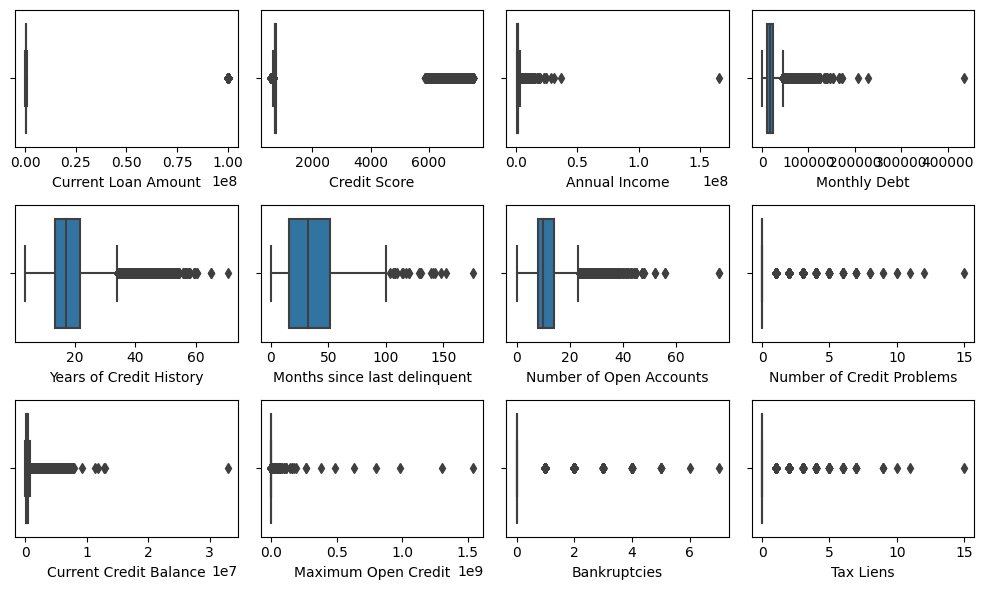

In [16]:
df_num=df.select_dtypes(include=np.number)
a,b,c=3,4,1
fig = plt.figure(figsize = (10,6))
for i in df_num:
    plt.subplot(a, b, c)
    sns.boxplot(data = df, x = i)
    c = c + 1
plt.tight_layout()
plt.show()

# Categorical Data

In [17]:
# only for display categorical columns
df_cat=df.select_dtypes(include="category")
df_cat.head()

Loan Status        Term Years in current job Home Ownership  \
0  Fully Paid  Short Term              8 years  Home Mortgage   
1  Fully Paid  Short Term            10+ years  Home Mortgage   
2  Fully Paid  Short Term              8 years       Own Home   
3  Fully Paid   Long Term              3 years       Own Home   
4  Fully Paid  Short Term              5 years           Rent   

              Purpose  
0   Home Improvements  
1  Debt Consolidation  
2  Debt Consolidation  
3  Debt Consolidation  
4  Debt Consolidation

In [18]:
df.describe(include="category").T

count unique                 top   freq
Loan Status           89785      2          Fully Paid  67146
Term                  89785      2          Short Term  66023
Years in current job  85983     11           10+ years  27755
Home Ownership        89785      4       Home Mortgage  43548
Purpose               89785     16  Debt Consolidation  70834

1. Loan Status:

Two unique values: "Fully Paid" and "Charged Off."
The dataset is imbalanced towards "Fully Paid" loans, as there are significantly more instances of "Fully Paid" compared to "Charged Off" 

2. Term:

Two unique values: "Short Term" and "Long Term."
The distribution of loan terms is provided, with "Short Term" being more common.

3. Years in Current Job:

Eleven unique values, including "10+ years."
There are various categories indicating the number of years in the current job, including "< 1 year" and "10+ years."


4. Home Ownership:

Four unique values: "Home Mortgage," "Own Home," "Rent," and "HaveMortgage."


5. Purpose:

Sixteen unique values, with "Debt Consolidation" being the most frequent.


In [19]:
df["Loan Status"].unique()

['Fully Paid', 'Charged Off', NaN]
Categories (2, object): ['Charged Off', 'Fully Paid']

In [20]:
df["Term"].unique()

['Short Term', 'Long Term', NaN]
Categories (2, object): ['Long Term', 'Short Term']

In [21]:
df["Years in current job"].unique()

['8 years', '10+ years', '3 years', '5 years', '< 1 year', ..., '9 years', '7 years', '1 year', NaN, '6 years']
Length: 12
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years', '9 years', '< 1 year']

Need To Convert for better Undersatnding

"< 1 year": 0,

"1 year": 1,

"2 years": 2,

"3 years": 3,

"4 years": 4,

"5 years": 5,

"6 years": 6,

"7 years": 7,

"8 years": 8,

"9 years": 9,

"10+ years": 10

In [22]:
df['Years in current job'] = df['Years in current job'].map({"< 1 year": 0,"1 year": 1,"2 years": 2,"3 years": 3,
                                                                 "4 years": 4,"5 years": 5,"6 years": 6,"7 years": 7,
                                                                 "8 years": 8,"9 years": 9,"10+ years": 10})

df['Years in current job'] =df['Years in current job'].astype('category')

In [23]:
df["Home Ownership"].unique()

['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', NaN]
Categories (4, object): ['HaveMortgage', 'Home Mortgage', 'Own Home', 'Rent']

In [24]:
#Convert as'HaveMortgage'to 'Home Mortgage'
df["Home Ownership"] = df["Home Ownership"].replace('HaveMortgage','Home Mortgage')
df["Home Ownership"].unique()

['Home Mortgage', 'Own Home', 'Rent', NaN]
Categories (3, object): ['Home Mortgage', 'Own Home', 'Rent']

In [25]:
df["Purpose"].unique()

['Home Improvements', 'Debt Consolidation', 'Buy House', 'other', 'Business Loan', ..., 'vacation', 'Educational Expenses', 'moving', 'renewable_energy', NaN]
Length: 17
Categories (16, object): ['Business Loan', 'Buy House', 'Buy a Car', 'Debt Consolidation', ..., 'renewable_energy', 'small_business', 'vacation', 'wedding']

In [26]:
df.describe(include="category").T

count unique                 top   freq
Loan Status           89785      2          Fully Paid  67146
Term                  89785      2          Short Term  66023
Years in current job  85983     11                  10  27755
Home Ownership        89785      3       Home Mortgage  43731
Purpose               89785     16  Debt Consolidation  70834

# Numerical data 

In [27]:
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [28]:
df.describe().T

count            mean             std  \
Current Loan Amount          89785.000000 13060894.718427 33295559.586484   
Credit Score                 70631.000000     1130.830598     1571.037395   
Annual Income                70631.000000  1375894.387691  1104851.698607   
Monthly Debt                 89785.000000    18396.906410    12145.282372   
Years of Credit History      89785.000000       18.248642        7.034607   
Months since last delinquent 41448.000000       34.975873       22.008585   
Number of Open Accounts      89785.000000       11.123250        4.998884   
Number of Credit Problems    89785.000000        0.164983        0.478010   
Current Credit Balance       89785.000000   294035.131993   372227.698341   
Maximum Open Credit          89783.000000   775656.504995  8803517.441152   
Bankruptcies                 89595.000000        0.115531        0.347919   
Tax Liens                    89776.000000        0.028605        0.255108   

                                      min           25%            50%  \
Current Loan Amount          10802.000000 180268.000000  313874.000000   
Credit Score                   585.000000    708.000000     729.000000   
Annual Income                76627.000000 847932.000000 1168975.000000   
Monthly Debt                     0.000000  10157.400000   16140.310000   
Years of Credit History          3.600000     13.500000      17.000000   
Months since last delinquent     0.000000     16.000000      32.000000   
Number of Open Accounts          0.000000      8.000000      10.000000   
Number of Credit Problems        0.000000      0.000000       0.000000   
Current Credit Balance           0.000000 112936.000000  209722.000000   
Maximum Open Credit              0.000000 277068.000000  472692.000000   
Bankruptcies                     0.000000      0.000000       0.000000   
Tax Liens                        0.000000      0.000000       0.000000   

                                        75%               max  
Current Loan Amount           532378.000000   99999999.000000  
Credit Score                     742.000000       7510.000000  
Annual Income                1648915.000000  165557393.000000  
Monthly Debt                   23918.910000     435843.280000  
Years of Credit History           21.700000         70.500000  
Months since last delinquent      51.000000        176.000000  
Number of Open Accounts           14.000000         76.000000  
Number of Credit Problems          0.000000         15.000000  
Current Credit Balance        367517.000000   32878968.000000  
Maximum Open Credit           791450.000000 1539737892.000000  
Bankruptcies                       0.000000          7.000000  
Tax Liens                          0.000000         15.000000

1. Current Loan Amount:

The dataset has a wide range of loan amounts, from 10,802 to 99,999,999. The maximum value of 99,999,999 may indicate a placeholder or error. Consider investigating and handling such extreme values to avoid skewing analyses.

2. Credit Score:

The credit scores range from 585 to 7,510. Scores above 900 have to be treated.

3. Annual Income:

The average annual income is approximately 1,375,894. There is a large standard deviation, indicating variability. The maximum value of 165,557,393 may be an outlier. Investigate and potentially handle extreme values.

4. Monthly Debt:

Monthly debt ranges from 0 to 435,843.28. The minimum value of $0 may require investigation, as it could represent missing or erroneous data. Check if this is accurate.

5. Years of Credit History:

The average years of credit history is around 18.25, with a range from 3.6 to 70.5. No specific issues are apparent in this column.

6. Months since Last Delinquent:

For the subset with information available, the average months since the last delinquent is about 34.98. Investigate missing values and consider whether this variable is relevant for analysis.


7. Number of Open Accounts:

On average, individuals have 11.12 open accounts, ranging from 0 to 76. No specific issues are apparent in this column.


8. Number of Credit Problems:

The average number of credit problems is low (0.165). Most individuals have no recorded credit problems. Check for any patterns or outliers.


9. Current Credit Balance:

The mean current credit balance is 294,035.13, with a wide range. Investigate extreme values, and consider transformations if needed for modeling.


10. Maximum Open Credit:

The average maximum open credit is 775,656.50, with a wide range. Investigate extreme values and consider transformations.


11. Bankruptcies:

On average, individuals have 0.115 bankruptcies, with a maximum of 7. Check for patterns and handle outliers if necessary.


12. Tax Liens:

The average number of tax liens is low (0.029). Check for patterns and handle outliers if necessary.

Data Cleaning:


   1. Investigate and handle outliers in columns with wide ranges, such as "Current Loan Amount," "Annual Income," and "Maximum Open Credit."
   
   2. Address missing or erroneous data, especially in columns like "Monthly Debt" with a minimum value of 0.

   3. Standardize units if necessary, especially for monetary values.

   4. Normalize or transform skewed variables for better modeling performance.
    
    
    
Analysis Required:


   1. Explore relationships between variables through visualizations and correlation analysis.

   2. Consider feature engineering, such as creating a debt-to-income ratio or grouping credit scores into categories.

   3. Understand the impact of each variable on the target variable ("Loan Status" or similar) for predictive modeling.

### Missing Values:

Columns like "Credit Score," "Annual Income," "Years in current job," "Months since last delinquent," "Maximum Open Credit," "Bankruptcies," and "Tax Liens" have missing values.
The count of non-null values for each column indicates the extent of missing data.

In [29]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

Total  Percentage of Missing Values
Months since last delinquent  48338                     53.836901
Credit Score                  19155                     21.334061
Annual Income                 19155                     21.334061
Years in current job           3803                      4.235627
Bankruptcies                    191                      0.212728
Tax Liens                        10                      0.011138
Maximum Open Credit               3                      0.003341
Current Credit Balance            1                      0.001114
Number of Credit Problems         1                      0.001114
Number of Open Accounts           1                      0.001114
Loan Status                       1                      0.001114
Years of Credit History           1                      0.001114
Current Loan Amount               1                      0.001114
Purpose                           1                      0.001114
Home Ownership                    1                      0.001114
Term                              1                      0.001114
Monthly Debt                      1                      0.001114

### Columns with 0 or very few missing values (e.g., 1):

"Loan Status," "Current Loan Amount," "Term," "Home Ownership," "Purpose," "Monthly Debt," "Years of Credit History," "Number of Open Accounts," "Number of Credit Problems," "Current Credit Balance," "Maximum Open Credit," "Bankruptcies," and "Tax Liens" have minimal or no missing values (less than 1%).

### Columns with a moderate number of missing values (around 4%):

"Years in current job" has around 4.24% missing values. This is a moderate percentage, and you may consider imputing these missing values based on the distribution of the existing data.

### Columns with a significant number of missing values (over 20%):

"Credit Score" and "Annual Income" have approximately 21.33% missing values, and "Months since last delinquent" has a substantial 53.84% missing values. These columns have a considerable amount of missing data, and careful consideration is needed to handle them. Imputation, data exploration, or dropping these columns are potential strategies depending on the context.

In [30]:
# Visualization Of Missing Values

<AxesSubplot:>

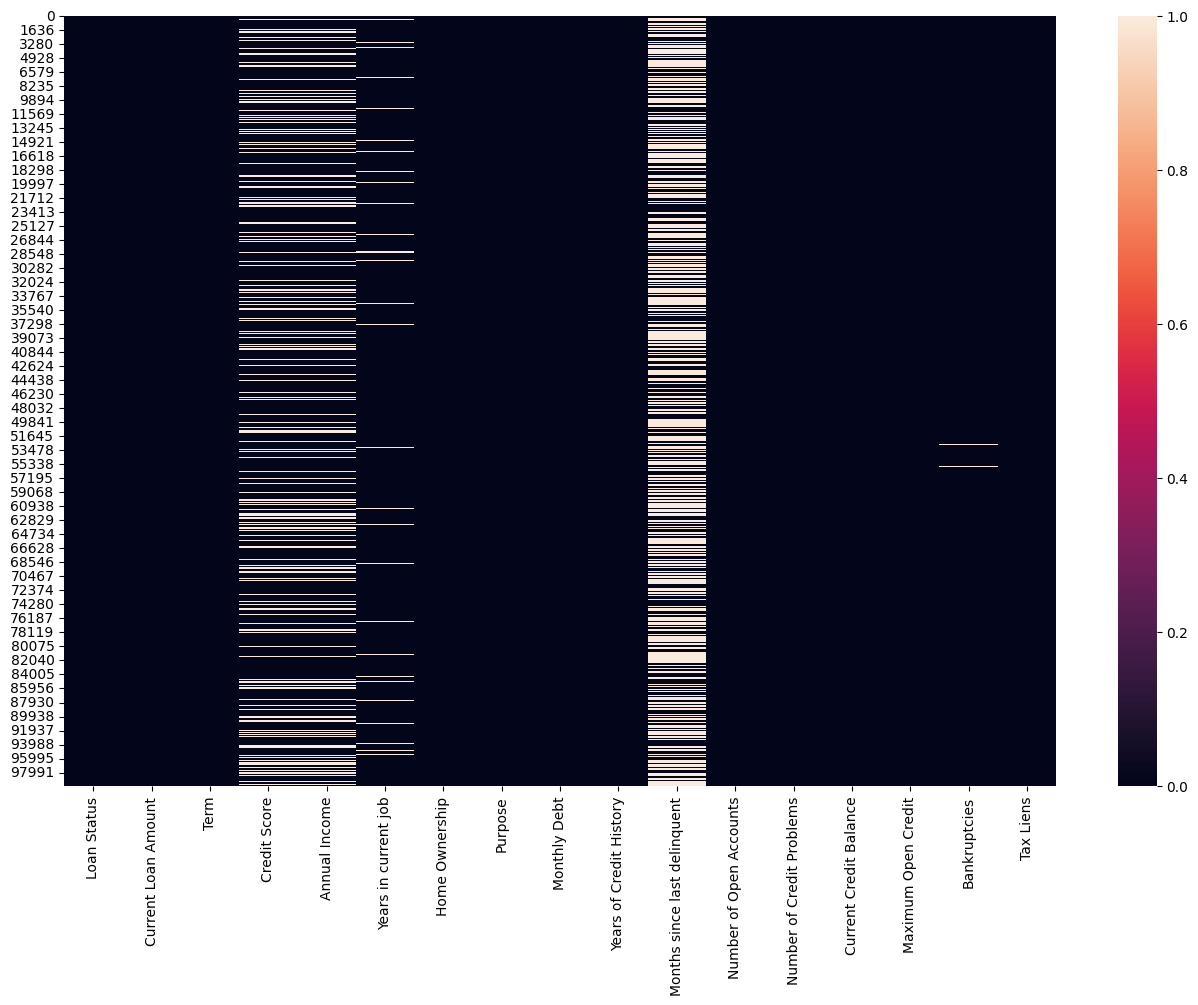

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())

This visualization aids in understanding the structure of missing data in the loan dataset, assisting in making informed decisions for data preprocessing and imputation.

The heatmap can guide imputation strategies, highlighting columns where missing values might be handled collectively or where careful imputation decisions are necessary, especially in the case of "Months since last delinquent", "Credit Score" And " Annual Income".

# Current Loan Amount

<AxesSubplot:>

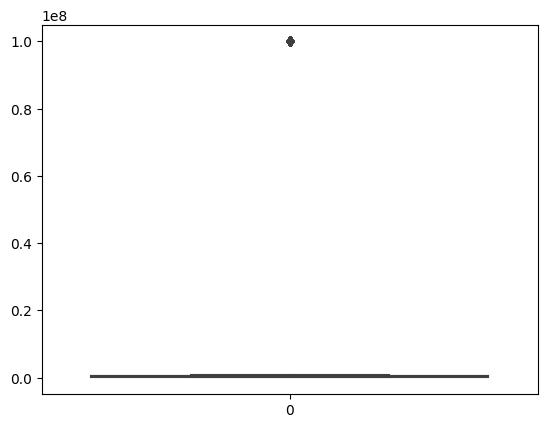

In [32]:
sns.boxplot(df['Current Loan Amount'])

In [33]:
df.drop(df[df['Current Loan Amount']>10000000].index, inplace=True)

<AxesSubplot:>

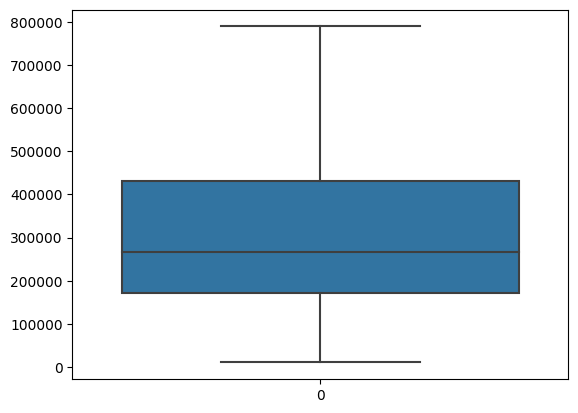

In [34]:
sns.boxplot(df['Current Loan Amount'])

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Density'>

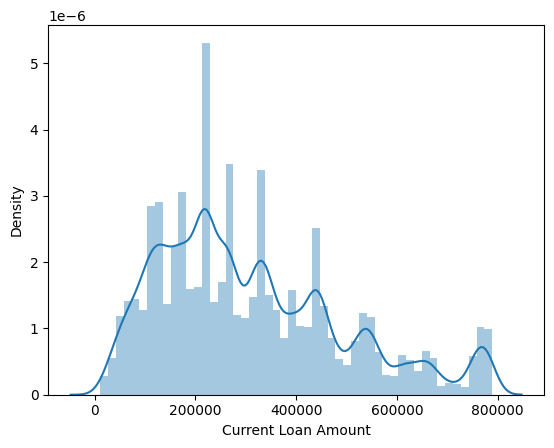

In [35]:
sns.distplot(df['Current Loan Amount'])

# Months since last delinquent

In [36]:
# Replace missing values in the specified column with zeros
df['Months since last delinquent'].fillna(0, inplace=True)

<AxesSubplot:>

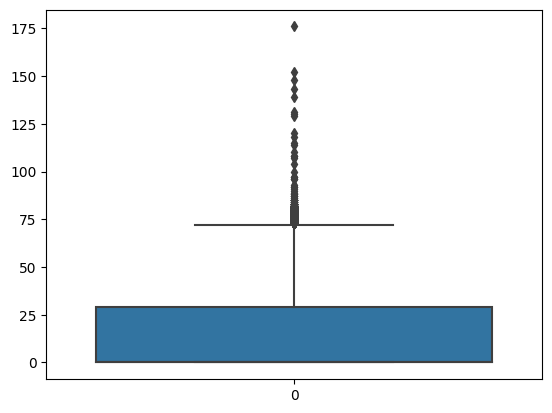

In [37]:
sns.boxplot(df['Months since last delinquent'])

In [38]:
#The range of values seems normal. Hence outlier treatement not necessary.

# Years in current job

In [39]:
years_null=df[df['Years in current job'].isnull()]
years_null.describe().T

count          mean            std  \
Current Loan Amount          3374.000000 238265.933610  158356.162772   
Credit Score                 2564.000000   1332.501950    1887.578683   
Annual Income                2564.000000 904452.472309  520976.349799   
Monthly Debt                 3374.000000  13216.597321    9479.440807   
Years of Credit History      3374.000000     22.716686       9.683141   
Months since last delinquent 3375.000000     17.084444      23.599334   
Number of Open Accounts      3374.000000      9.893005       4.557449   
Number of Credit Problems    3374.000000      0.297273       0.630492   
Current Credit Balance       3374.000000 244601.438648  332781.154610   
Maximum Open Credit          3374.000000 717130.550682 3402558.805885   
Bankruptcies                 3374.000000      0.218139       0.463762   
Tax Liens                    3374.000000      0.047125       0.332768   

                                       min           25%           50%  \
Current Loan Amount           21494.000000 118800.000000 206943.000000   
Credit Score                    586.000000    708.000000    729.000000   
Annual Income                130150.000000 531311.250000 816534.500000   
Monthly Debt                      0.000000   6079.240000  11117.090000   
Years of Credit History           3.900000     15.600000     20.500000   
Months since last delinquent      0.000000      0.000000      0.000000   
Number of Open Accounts           1.000000      7.000000      9.000000   
Number of Credit Problems         0.000000      0.000000      0.000000   
Current Credit Balance            0.000000  89589.750000 165746.500000   
Maximum Open Credit               0.000000 233282.500000 397859.000000   
Bankruptcies                      0.000000      0.000000      0.000000   
Tax Liens                         0.000000      0.000000      0.000000   

                                        75%              max  
Current Loan Amount           324450.500000    787952.000000  
Credit Score                     743.000000      7500.000000  
Annual Income                1145358.000000   5121108.000000  
Monthly Debt                   17997.085000     83369.720000  
Years of Credit History           28.800000        60.500000  
Months since last delinquent      33.000000       108.000000  
Number of Open Accounts           12.000000        34.000000  
Number of Credit Problems          0.000000        10.000000  
Current Credit Balance        298010.250000   5742218.000000  
Maximum Open Credit           675031.500000 161791542.000000  
Bankruptcies                       0.000000         4.000000  
Tax Liens                          0.000000         9.000000

In [40]:
df[df['Annual Income']>100000000]

Loan Status  Current Loan Amount        Term  Credit Score  \
85662  Charged Off        176132.000000  Short Term   7250.000000   

         Annual Income Years in current job Home Ownership  \
85662 165557393.000000                   10  Home Mortgage   

                  Purpose  Monthly Debt  Years of Credit History  \
85662  Debt Consolidation  15176.060000                16.000000   

       Months since last delinquent  Number of Open Accounts  \
85662                      0.000000                11.000000   

       Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
85662                   0.000000           312778.000000        669438.000000   

       Bankruptcies  Tax Liens  
85662      0.000000   0.000000

In [41]:
df.drop(df[df['Annual Income']>100000000].index, inplace=True)

In [42]:
years_null.head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
29   Fully Paid        107404.000000  Short Term           NaN            NaN   
73   Fully Paid        311058.000000   Long Term    675.000000 1343167.000000   
84   Fully Paid        262988.000000  Short Term    743.000000 1340279.000000   
96   Fully Paid        158818.000000  Short Term    731.000000  315666.000000   
169  Fully Paid         64966.000000  Short Term    723.000000 1224968.000000   

    Years in current job Home Ownership             Purpose  Monthly Debt  \
29                   NaN  Home Mortgage               other  19238.070000   
73                   NaN  Home Mortgage  Debt Consolidation  21378.800000   
84                   NaN           Rent  Debt Consolidation   9348.380000   
96                   NaN       Own Home  Debt Consolidation   8522.830000   
169                  NaN  Home Mortgage               other  23172.210000   

     Years of Credit History  Months since last delinquent  \
29                 43.700000                      0.000000   
73                 31.400000                     17.000000   
84                 28.200000                     35.000000   
96                 31.300000                     60.000000   
169                44.000000                     48.000000   

     Number of Open Accounts  Number of Credit Problems  \
29                  5.000000                   0.000000   
73                 11.000000                   0.000000   
84                  9.000000                   0.000000   
96                 13.000000                   2.000000   
169                16.000000                   0.000000   

     Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
29             28956.000000         58014.000000      0.000000   0.000000  
73            247912.000000        541596.000000      0.000000   0.000000  
84            499548.000000        681296.000000      0.000000   0.000000  
96            260072.000000        756646.000000      0.000000   2.000000  
169           858154.000000       1344574.000000      0.000000   0.000000

<AxesSubplot:ylabel='Annual Income'>

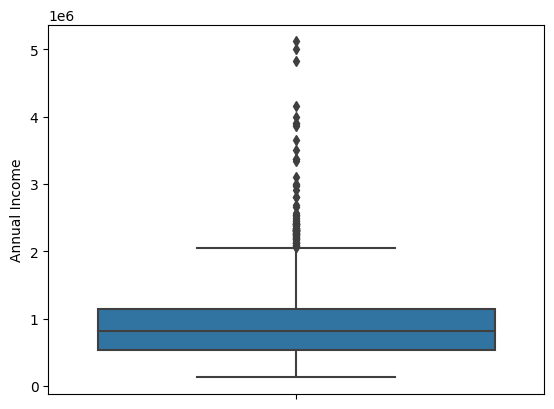

In [43]:
sns.boxplot(data=years_null, y='Annual Income')

<AxesSubplot:xlabel='Years in current job', ylabel='Annual Income'>

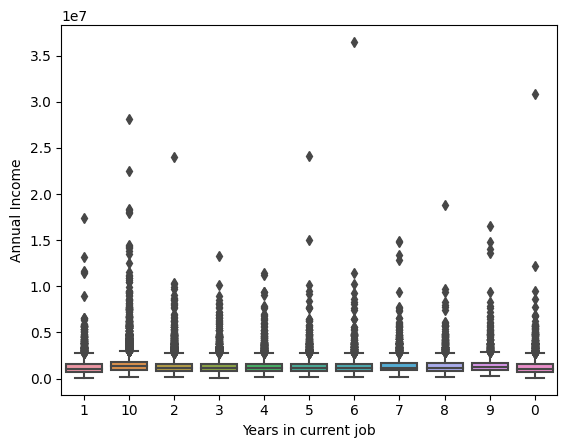

In [44]:
sns.boxplot(data=df, x='Years in current job', y='Annual Income')

In [45]:
df[df['Annual Income']>130150.000000].count()

Loan Status                     59141
Current Loan Amount             59141
Term                            59141
Credit Score                    59141
Annual Income                   59141
Years in current job            56578
Home Ownership                  59141
Purpose                         59141
Monthly Debt                    59141
Years of Credit History         59141
Months since last delinquent    59141
Number of Open Accounts         59141
Number of Credit Problems       59141
Current Credit Balance          59141
Maximum Open Credit             59140
Bankruptcies                    59021
Tax Liens                       59137
dtype: int64

In [46]:
#There are 70k entries with annual income greater than 130k which is min value of the dataset with null values in experience.
# There is no clear method to impute income null values.
#Since it is 4% of the total, we can drop the null values.

In [47]:
years_null_num=years_null.select_dtypes("number")

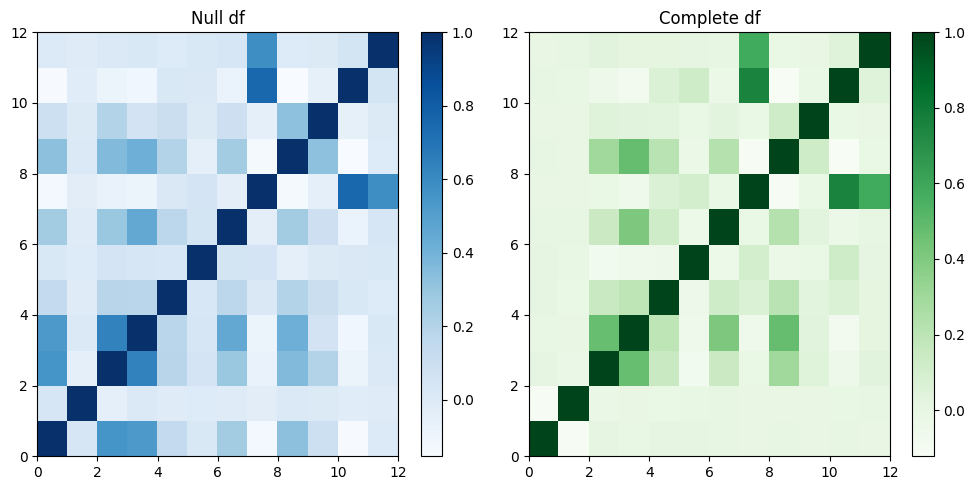

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create the first heatmap
ax1 = axes[0]
heatmap1 = ax1.pcolor(years_null_num.corr(), cmap='Blues')
fig.colorbar(heatmap1, ax=ax1)
ax1.set_title('Null df')

# Create the second heatmap
ax2 = axes[1]
heatmap2 = ax2.pcolor(df_num.corr(), cmap='Greens')
fig.colorbar(heatmap2, ax=ax2)
ax2.set_title('Complete df')


# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()


In [49]:
#Both dataframes look similar. Hence Imputating null values with a single value alters the dataset. 
# Hence the missing value rows are dropped.

In [50]:
df.dropna(subset=['Years in current job'], inplace=True)

In [51]:
df.shape

(74926, 17)

# Annual Income and Credit Score

In [52]:
null_inc=df[df['Annual Income'].isnull()]
null_inc.head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
1    Fully Paid        262328.000000  Short Term           NaN            NaN   
4    Fully Paid        176220.000000  Short Term           NaN            NaN   
7   Charged Off        648714.000000   Long Term           NaN            NaN   
11   Fully Paid        541970.000000  Short Term           NaN            NaN   
15   Fully Paid        449020.000000   Long Term           NaN            NaN   

   Years in current job Home Ownership             Purpose  Monthly Debt  \
1                    10  Home Mortgage  Debt Consolidation  33295.980000   
4                     5           Rent  Debt Consolidation  20639.700000   
7                     0  Home Mortgage           Buy House  14806.130000   
11                   10  Home Mortgage   Home Improvements  23568.550000   
15                    9       Own Home  Debt Consolidation  18904.810000   

    Years of Credit History  Months since last delinquent  \
1                 21.100000                      8.000000   
4                  6.100000                      0.000000   
7                  8.200000                      8.000000   
11                23.200000                      0.000000   
15                19.400000                      0.000000   

    Number of Open Accounts  Number of Credit Problems  \
1                 35.000000                   0.000000   
4                 15.000000                   0.000000   
7                 15.000000                   0.000000   
11                23.000000                   0.000000   
15                 8.000000                   0.000000   

    Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
1            229976.000000        850784.000000      0.000000   0.000000  
4            253460.000000        427174.000000      0.000000   0.000000  
7            193306.000000        864204.000000      0.000000   0.000000  
11            60705.000000       1634468.000000      0.000000   0.000000  
15           334533.000000        428956.000000      0.000000   0.000000

In [53]:
null_inc['Credit Score'].unique()

array([nan])

In [54]:
#All the null entries of Income and Credit score are the same.

In [55]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: x//10 if x > 900  else x)

<AxesSubplot:xlabel='Credit Score'>

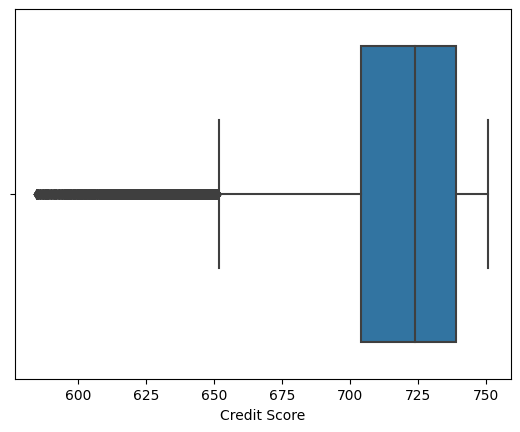

In [56]:
sns.boxplot(data=df, x='Credit Score')

In [57]:
df.tail()

Loan Status  Current Loan Amount        Term  Credit Score  \
99989  Charged Off        429132.000000  Short Term           NaN   
99992   Fully Paid         48796.000000  Short Term           NaN   
99994   Fully Paid        210584.000000  Short Term    719.000000   
99997   Fully Paid        103136.000000  Short Term    742.000000   
99998   Fully Paid        530332.000000  Short Term    746.000000   

       Annual Income Years in current job Home Ownership             Purpose  \
99989            NaN                   10  Home Mortgage  Debt Consolidation   
99992            NaN                    4  Home Mortgage      major_purchase   
99994  783389.000000                    1  Home Mortgage               Other   
99997 1150545.000000                    6           Rent  Debt Consolidation   
99998 1717524.000000                    9           Rent  Debt Consolidation   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
99989  28948.020000                16.300000                      0.000000   
99992   8298.630000                 8.300000                      0.000000   
99994   3727.610000                17.400000                     18.000000   
99997   7315.570000                18.800000                     18.000000   
99998   9890.070000                15.000000                      0.000000   

       Number of Open Accounts  Number of Credit Problems  \
99989                16.000000                   0.000000   
99992                 9.000000                   0.000000   
99994                 6.000000                   0.000000   
99997                12.000000                   1.000000   
99998                 8.000000                   0.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
99989           485279.000000        656414.000000      0.000000   0.000000  
99992            87875.000000        239404.000000      0.000000   0.000000  
99994              456.000000        259160.000000      0.000000   0.000000  
99997           109554.000000        537548.000000      1.000000   0.000000  
99998           404225.000000        738254.000000      0.000000   0.000000

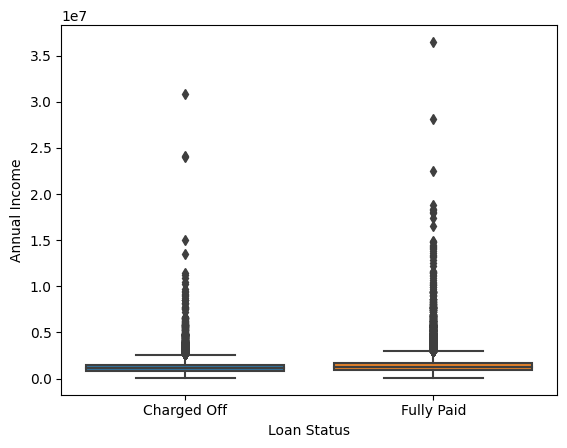

In [58]:
sns.boxplot(x='Loan Status', y='Annual Income', data=df)
plt.show()

In [59]:
fully_paid_data = df[df['Loan Status'] == 'Fully Paid']
charged_off_data = df[df['Loan Status'] == 'Charged Off']

In [60]:
# Impute missing values in 'Annual Income' for 'Fully Paid' subset
fully_paid_data['Annual Income'].fillna(fully_paid_data['Annual Income'].median(), inplace=True)
fully_paid_data['Credit Score'].fillna(fully_paid_data['Credit Score'].median(), inplace=True)
# Impute missing values in 'Annual Income' for 'Charged Off' subset
charged_off_data['Annual Income'].fillna(charged_off_data['Annual Income'].median(), inplace=True)
charged_off_data['Credit Score'].fillna(charged_off_data['Credit Score'].median(), inplace=True)
df = pd.concat([fully_paid_data, charged_off_data, df[df['Loan Status'].isnull()]])

<AxesSubplot:>

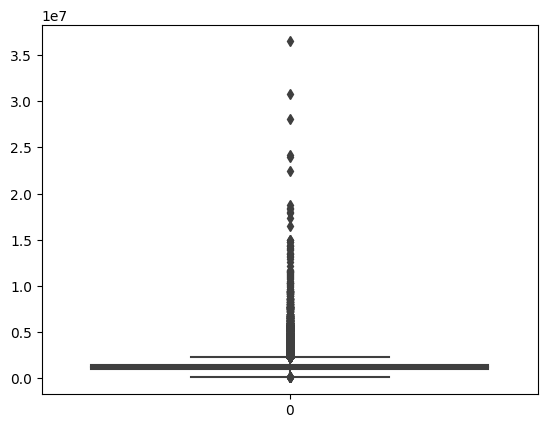

In [61]:
sns.boxplot(df['Annual Income'])

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

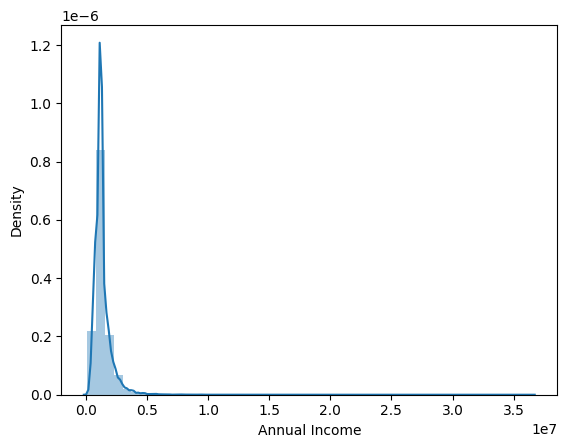

In [62]:
sns.distplot(df['Annual Income'])

Text(0.5, 1.0, 'log(Maximum Open Credit)')

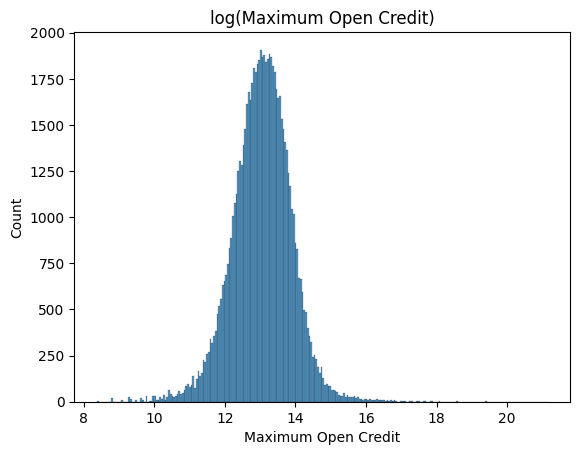

In [63]:
log_MOC= np.log(df['Maximum Open Credit'])
sns.histplot(log_MOC)
plt.title(f'log(Maximum Open Credit)')

# Bankruptcies and Tax Liens

In [64]:
df['Bankruptcies'].fillna(0, inplace=True)
df['Tax Liens'].fillna(0, inplace=True)

In [65]:
df[df['Maximum Open Credit'].isnull()]

Loan Status  Current Loan Amount        Term  Credit Score  \
30180  Charged Off         32340.000000  Short Term    718.000000   
98710  Charged Off         45144.000000  Short Term    703.000000   

       Annual Income Years in current job Home Ownership             Purpose  \
30180 1115613.500000                    2           Rent  Debt Consolidation   
98710 1806995.000000                   10           Rent  Debt Consolidation   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
30180   9620.460000                15.300000                     26.000000   
98710  36290.380000                22.400000                     37.000000   

       Number of Open Accounts  Number of Credit Problems  \
30180                 3.000000                   0.000000   
98710                 9.000000                   0.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
30180                0.000000                  NaN      0.000000   0.000000  
98710                0.000000                  NaN      0.000000   0.000000

In [66]:
df.dropna(subset=['Maximum Open Credit'], inplace=True)

In [67]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

# Current Credit Balance

<AxesSubplot:>

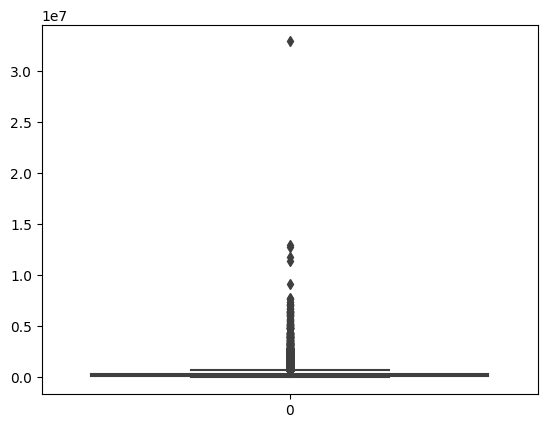

In [68]:
sns.boxplot(df['Current Credit Balance'])

In [69]:
df[df['Current Credit Balance']>10000000]

Loan Status  Current Loan Amount        Term  Credit Score  \
45497   Fully Paid        761684.000000   Long Term    691.000000   
51445   Fully Paid        760298.000000  Short Term    733.000000   
67718   Fully Paid        235312.000000   Long Term    724.000000   
96221   Fully Paid        773784.000000   Long Term    710.000000   
15837  Charged Off        762850.000000  Short Term    732.000000   

       Annual Income Years in current job Home Ownership             Purpose  \
45497 4698700.000000                   10  Home Mortgage  Debt Consolidation   
51445 8629876.000000                   10  Home Mortgage   Home Improvements   
67718 6580802.000000                    2       Own Home  Debt Consolidation   
96221 5155137.000000                   10  Home Mortgage  Debt Consolidation   
15837 7529320.000000                   10  Home Mortgage               other   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
45497 124907.140000                36.500000                      0.000000   
51445  87017.910000                24.100000                      0.000000   
67718 120647.910000                33.100000                      0.000000   
96221 101813.970000                22.900000                      0.000000   
15837 205801.350000                32.500000                      0.000000   

       Number of Open Accounts  Number of Credit Problems  \
45497                27.000000                   0.000000   
51445                22.000000                   0.000000   
67718                10.000000                   0.000000   
96221                12.000000                   0.000000   
15837                28.000000                   0.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
45497         12986956.000000      20238944.000000      0.000000   0.000000  
51445         11361924.000000      20333720.000000      0.000000   0.000000  
67718         12746397.000000      14598408.000000      0.000000   0.000000  
96221         11796435.000000      16677694.000000      0.000000   0.000000  
15837         32878968.000000      98627914.000000      0.000000   0.000000

# Maximum Open Credit

<AxesSubplot:>

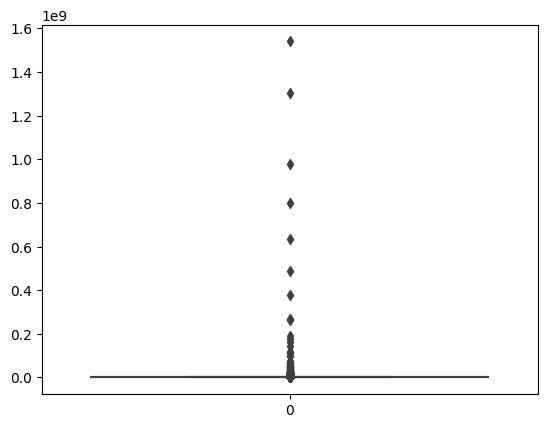

In [70]:
sns.boxplot(df['Maximum Open Credit'])

In [71]:
#Both Maximum open credit and current credit balance seems fine

# Monthly Debt

<AxesSubplot:>

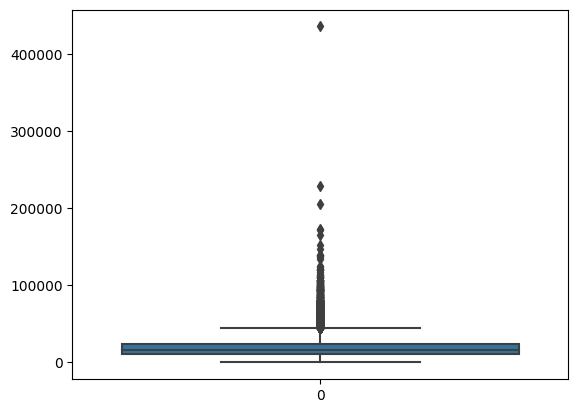

In [72]:
sns.boxplot(df['Monthly Debt'])

In [73]:
#Finding entries with monthly debt greater than outstanding credit.
df[df['Monthly Debt']>df['Current Credit Balance']].count()

Loan Status                     1428
Current Loan Amount             1428
Term                            1428
Credit Score                    1428
Annual Income                   1428
Years in current job            1428
Home Ownership                  1428
Purpose                         1428
Monthly Debt                    1428
Years of Credit History         1428
Months since last delinquent    1428
Number of Open Accounts         1428
Number of Credit Problems       1428
Current Credit Balance          1428
Maximum Open Credit             1428
Bankruptcies                    1428
Tax Liens                       1428
dtype: int64

In [74]:
df[df['Monthly Debt']>df['Current Credit Balance']].head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
18   Fully Paid         66396.000000  Short Term    725.000000 1231095.500000   
64   Fully Paid        171248.000000  Short Term    747.000000 3035725.000000   
362  Fully Paid         43318.000000  Short Term    708.000000  897769.000000   
402  Fully Paid         90112.000000  Short Term    725.000000 1231095.500000   
671  Fully Paid        209462.000000   Long Term    669.000000 1828009.000000   

    Years in current job Home Ownership             Purpose  Monthly Debt  \
18                    10           Rent  Debt Consolidation   9898.810000   
64                    10  Home Mortgage  Debt Consolidation  42500.150000   
362                    4           Rent               other   7391.570000   
402                    6           Rent               Other  13879.880000   
671                    4  Home Mortgage   Home Improvements  29400.600000   

     Years of Credit History  Months since last delinquent  \
18                 27.100000                      0.000000   
64                 31.500000                     17.000000   
362                17.900000                      0.000000   
402                13.100000                     11.000000   
671                17.000000                      0.000000   

     Number of Open Accounts  Number of Credit Problems  \
18                 23.000000                   1.000000   
64                 11.000000                   0.000000   
362                 2.000000                   0.000000   
402                 3.000000                   1.000000   
671                 7.000000                   1.000000   

     Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
18              9728.000000        402380.000000      1.000000   0.000000  
64             25460.000000        151140.000000      0.000000   0.000000  
362             3382.000000          4334.000000      0.000000   0.000000  
402              304.000000         32780.000000      0.000000   0.000000  
671            23028.000000         28666.000000      1.000000   0.000000

In [75]:
#Dropping the above as it is not possible to have monthly debt more than the outstanding credit
df.drop(df[df['Monthly Debt']>df['Current Credit Balance']].index, inplace=True)

In [76]:
#Finding entries with monthly debt greater than Current Loan Amount.
df[df['Monthly Debt']>df['Current Loan Amount']].count()

Loan Status                     77
Current Loan Amount             77
Term                            77
Credit Score                    77
Annual Income                   77
Years in current job            77
Home Ownership                  77
Purpose                         77
Monthly Debt                    77
Years of Credit History         77
Months since last delinquent    77
Number of Open Accounts         77
Number of Credit Problems       77
Current Credit Balance          77
Maximum Open Credit             77
Bankruptcies                    77
Tax Liens                       77
dtype: int64

In [77]:
df[df['Monthly Debt']>df['Current Loan Amount']].head()

Loan Status  Current Loan Amount        Term  Credit Score  \
1099  Fully Paid         52932.000000  Short Term    704.000000   
3017  Fully Paid         33594.000000  Short Term    725.000000   
5253  Fully Paid         22330.000000  Short Term    725.000000   
6043  Fully Paid         33022.000000  Short Term    749.000000   
6122  Fully Paid         21714.000000  Short Term    714.000000   

      Annual Income Years in current job Home Ownership             Purpose  \
1099 2247377.000000                    2  Home Mortgage               other   
3017 1231095.500000                   10       Own Home  Debt Consolidation   
5253 1231095.500000                   10  Home Mortgage               Other   
6043 2281824.000000                   10  Home Mortgage               Other   
6122 1822423.000000                    8  Home Mortgage      major_purchase   

      Monthly Debt  Years of Credit History  Months since last delinquent  \
1099  54124.350000                21.100000                     45.000000   
3017  39770.040000                14.400000                     18.000000   
5253  28939.850000                52.800000                      0.000000   
6043  53052.370000                17.700000                      0.000000   
6122  41763.900000                24.600000                     46.000000   

      Number of Open Accounts  Number of Credit Problems  \
1099                17.000000                   0.000000   
3017                12.000000                   0.000000   
5253                19.000000                   0.000000   
6043                21.000000                   0.000000   
6122                 8.000000                   0.000000   

      Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
1099           684019.000000       1001308.000000      0.000000   0.000000  
3017           251389.000000        642576.000000      0.000000   0.000000  
5253           424593.000000       1935560.000000      0.000000   0.000000  
6043            74100.000000       2200066.000000      0.000000   0.000000  
6122           851409.000000        972224.000000      0.000000   0.000000

In [78]:
#Dropping the above as it is not possible to have monthly debt more than the Current Loan Amount.
df.drop(df[df['Monthly Debt']>df['Current Loan Amount']].index, inplace=True)

# Years of Credit History

In [79]:
df['Years of Credit History'].describe()

count   73419.000000
mean       18.012100
std         6.809863
min         3.600000
25%        13.400000
50%        16.800000
75%        21.500000
max        70.500000
Name: Years of Credit History, dtype: float64

<AxesSubplot:>

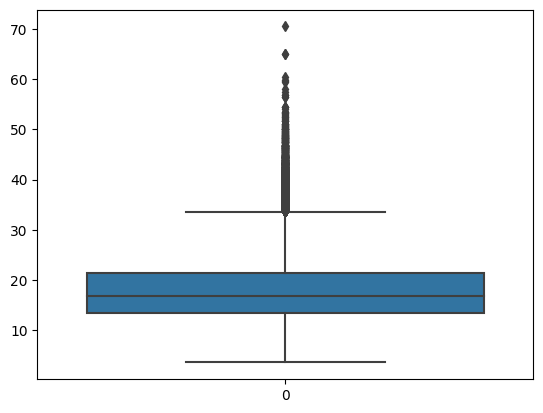

In [80]:
sns.boxplot(df['Years of Credit History'])

In [81]:
cred=df[df['Years of Credit History']>35]
cred.head(10)

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
151  Fully Paid         87846.000000  Short Term    736.000000  625879.000000   
195  Fully Paid        377322.000000  Short Term    740.000000 1288162.000000   
300  Fully Paid        319330.000000  Short Term    725.000000 1231095.500000   
311  Fully Paid        753368.000000  Short Term    725.000000 1231095.500000   
317  Fully Paid        175076.000000  Short Term    742.000000  748486.000000   
342  Fully Paid        224642.000000  Short Term    741.000000 1056039.000000   
441  Fully Paid        531168.000000   Long Term    724.000000 1834944.000000   
561  Fully Paid        266926.000000  Short Term    749.000000  922127.000000   
896  Fully Paid        457666.000000   Long Term    725.000000 1231095.500000   
986  Fully Paid        458700.000000   Long Term    725.000000 1231095.500000   

    Years in current job Home Ownership             Purpose  Monthly Debt  \
151                    4       Own Home  Debt Consolidation   6988.960000   
195                    0           Rent  Debt Consolidation  17068.080000   
300                   10  Home Mortgage  Debt Consolidation  35750.400000   
311                    7  Home Mortgage               Other  75878.020000   
317                    8           Rent               other   7983.800000   
342                    2           Rent  Debt Consolidation  14080.330000   
441                   10  Home Mortgage  Debt Consolidation  23242.700000   
561                    6  Home Mortgage  Debt Consolidation  10066.580000   
896                   10  Home Mortgage  Debt Consolidation   7381.310000   
986                    7  Home Mortgage  Debt Consolidation  13455.990000   

     Years of Credit History  Months since last delinquent  \
151                50.100000                     56.000000   
195                36.300000                     16.000000   
300                42.400000                     69.000000   
311                43.300000                      0.000000   
317                36.400000                      0.000000   
342                38.500000                      0.000000   
441                38.000000                     75.000000   
561                38.300000                     70.000000   
896                39.000000                      0.000000   
986                35.400000                     28.000000   

     Number of Open Accounts  Number of Credit Problems  \
151                16.000000                   0.000000   
195                 8.000000                   0.000000   
300                17.000000                   2.000000   
311                19.000000                   0.000000   
317                 7.000000                   0.000000   
342                 7.000000                   0.000000   
441                16.000000                   0.000000   
561                17.000000                   0.000000   
896                 4.000000                   0.000000   
986                10.000000                   1.000000   

     Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
151            96330.000000        714978.000000      0.000000   0.000000  
195           358549.000000        494824.000000      0.000000   0.000000  
300           381995.000000        785598.000000      0.000000   2.000000  
311           834784.000000       1378872.000000      0.000000   0.000000  
317           184490.000000        240856.000000      0.000000   0.000000  
342           252320.000000       1047200.000000      0.000000   0.000000  
441           534033.000000        942612.000000      0.000000   0.000000  
561           234346.000000        673332.000000      0.000000   0.000000  
896           173090.000000        209198.000000      0.000000   0.000000  
986           212173.000000        486508.000000      1.000000   0.000000

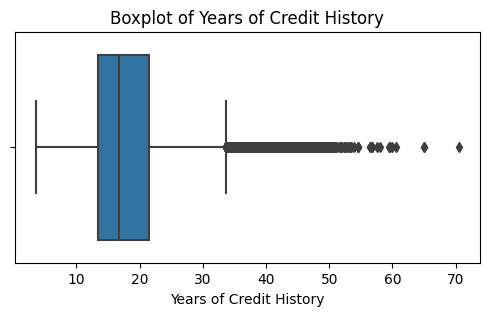

lower_bound 0
upper_bound 55


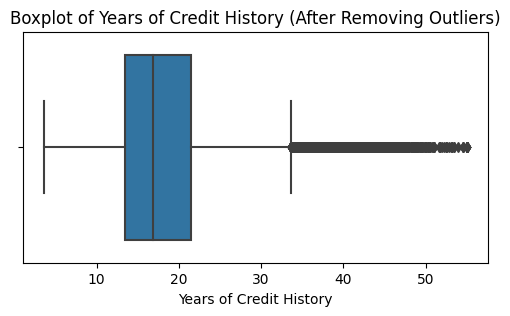

In [82]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='Years of Credit History', data=df)
plt.title('Boxplot of Years of Credit History')
plt.show()


lower_bound = 0
upper_bound = 55

print("lower_bound",lower_bound)
print("upper_bound",upper_bound)


outliers = df[(df['Years of Credit History'] < lower_bound) | (df['Years of Credit History'] > upper_bound)]

outliers

df['Years of Credit History'] = df['Years of Credit History'].apply(lambda x: 
                                                  upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


plt.figure(figsize=(6, 3))
sns.boxplot(x='Years of Credit History', data=df)
plt.title('Boxplot of Years of Credit History (After Removing Outliers)')
plt.show()


In [83]:
df['Years of Credit History'].describe()

count   73419.000000
mean       18.011185
std         6.804326
min         3.600000
25%        13.400000
50%        16.800000
75%        21.500000
max        55.000000
Name: Years of Credit History, dtype: float64

<AxesSubplot:xlabel='Years of Credit History', ylabel='Density'>

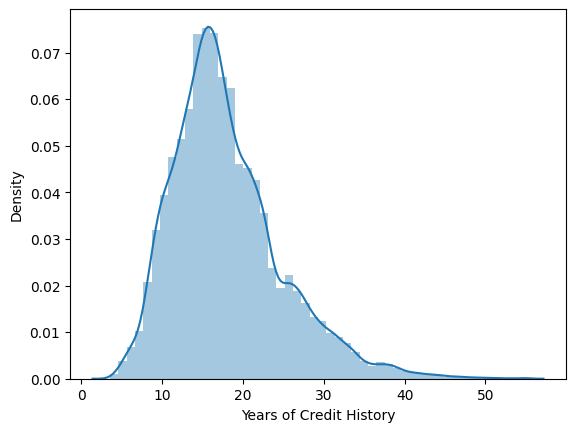

In [84]:
sns.distplot(df['Years of Credit History'])

# Number of Open Accounts

In [85]:
df['Number of Open Accounts'].describe()

count   73419.000000
mean       11.231875
std         4.996395
min         0.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        76.000000
Name: Number of Open Accounts, dtype: float64

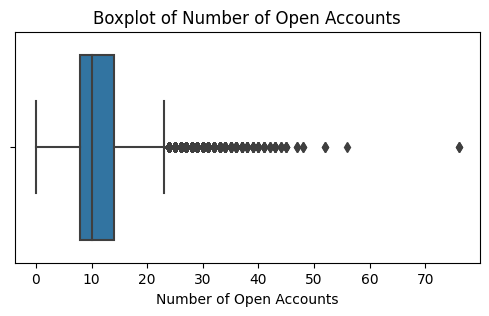

In [86]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='Number of Open Accounts', data=df)
plt.title('Boxplot of Number of Open Accounts')
plt.show()


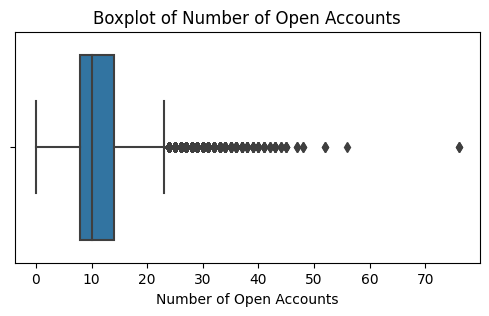

lower_bound 1.2500000000000018
upper_bound 33.65


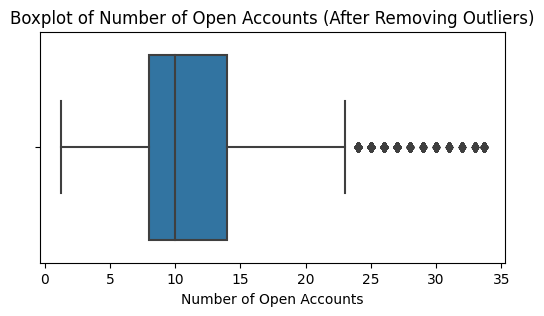

In [87]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='Number of Open Accounts', data=df)
plt.title('Boxplot of Number of Open Accounts')
plt.show()

Q1=df['Years of Credit History'].quantile(0.25)
Q3=df['Years of Credit History'].quantile(0.75)
IQR=Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print("lower_bound",lower_bound)
print("upper_bound",upper_bound)


outliers = df[(df['Number of Open Accounts'] < lower_bound) | (df['Number of Open Accounts'] > upper_bound)]

outliers

df['Number of Open Accounts'] = df['Number of Open Accounts'].apply(lambda x: 
                                                  upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


plt.figure(figsize=(6, 3))
sns.boxplot(x='Number of Open Accounts', data=df)
plt.title('Boxplot of Number of Open Accounts (After Removing Outliers)')
plt.show()


# Number of Credit Problems

In [88]:
df['Number of Credit Problems'].describe()

count   73419.000000
mean        0.158093
std         0.467763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: Number of Credit Problems, dtype: float64

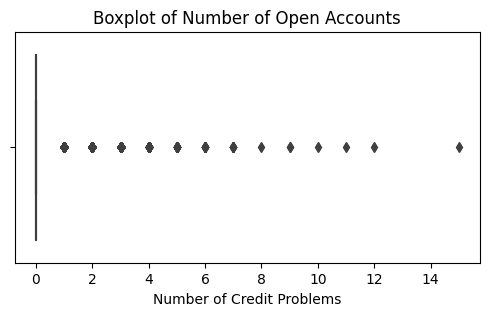

In [89]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='Number of Credit Problems', data=df)
plt.title('Boxplot of Number of Open Accounts')
plt.show()

features = ['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

sns.set_style("dark")
for a in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[a],label="skew:" + str(np.round(df[a].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[a])
    plt.subplot(133)
    stats.probplot(df[a], plot=plt)
    plt.tight_layout()

In [90]:
print('The final shape of the cleaned dataFrame is', df.shape)

The final shape of the cleaned dataFrame is (73419, 17)


In [91]:
df=df.reset_index(drop=True)

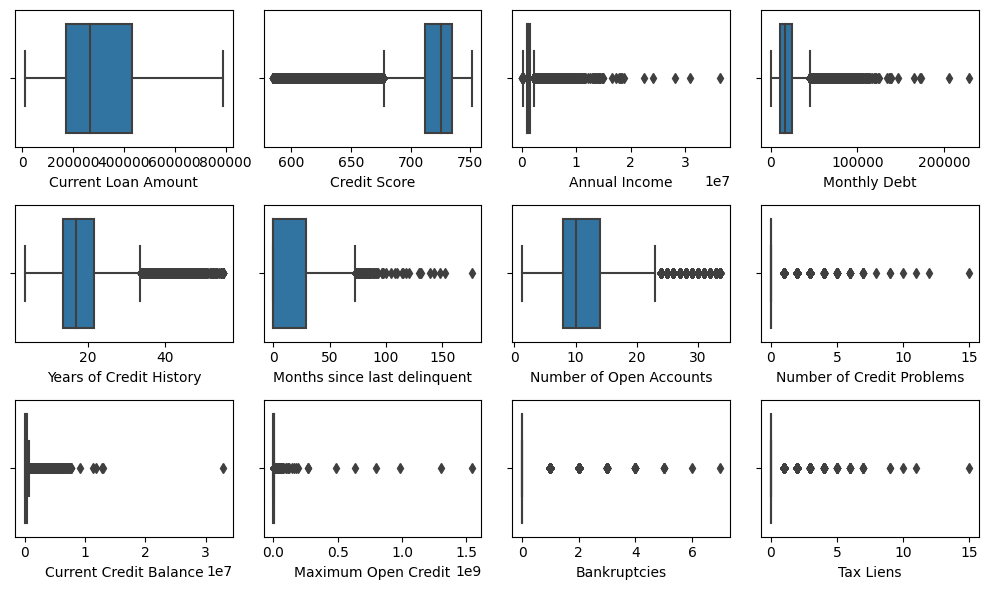

In [92]:
df_num=df.select_dtypes(include=np.number)
a,b,c=3,4,1
fig = plt.figure(figsize = (10,6))
for i in df_num:
    plt.subplot(a, b, c)
    sns.boxplot(data = df, x = i)
    c = c + 1
plt.tight_layout()
plt.show()

<AxesSubplot:>

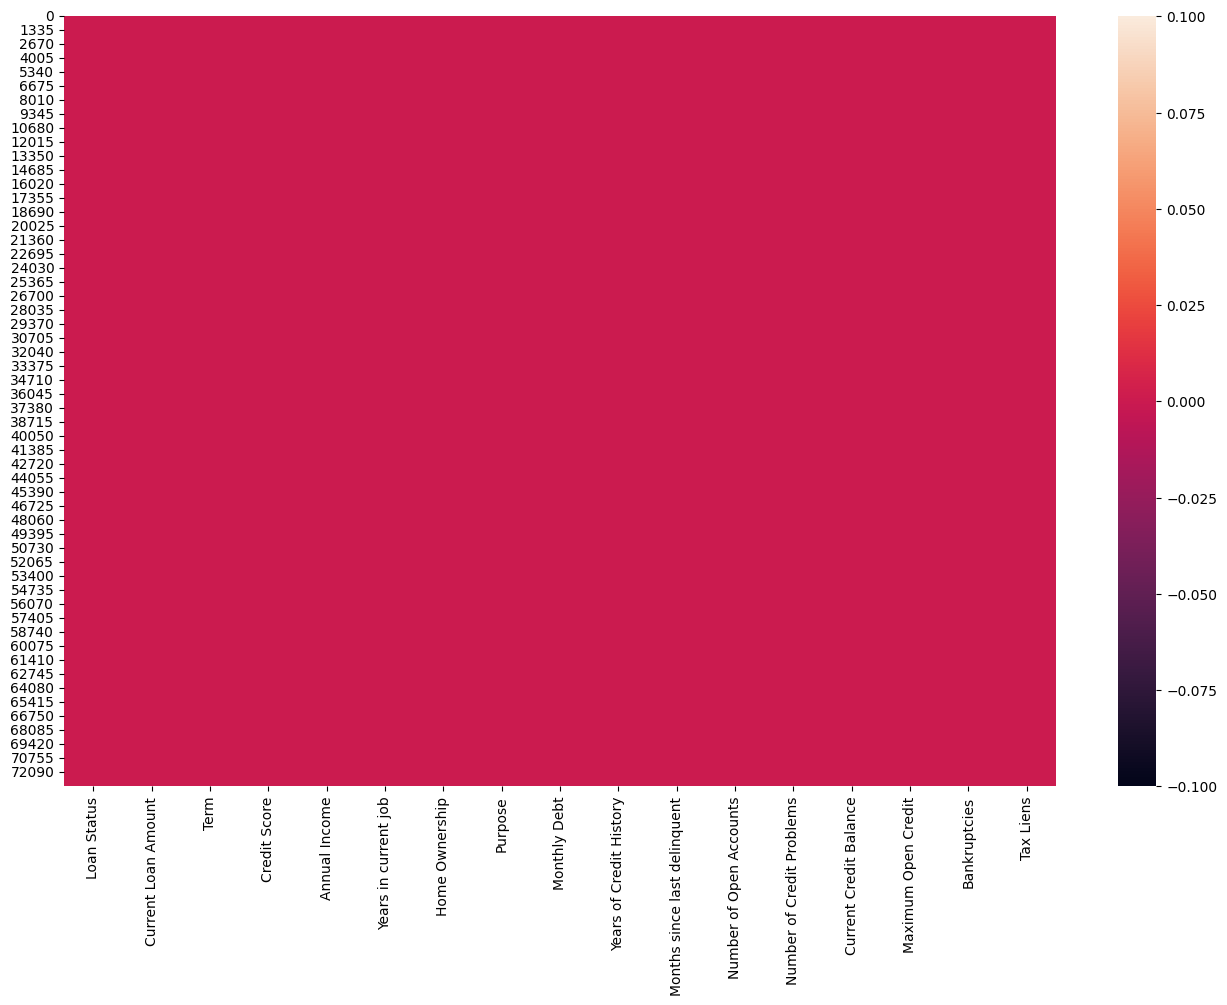

In [93]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())

# Categorical Columns

In [94]:
df_cat=df.select_dtypes(include="category")
df_cat.columns

Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')

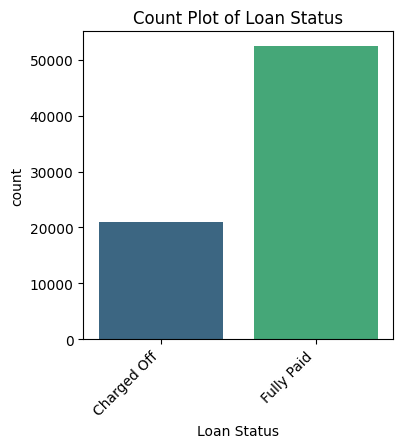

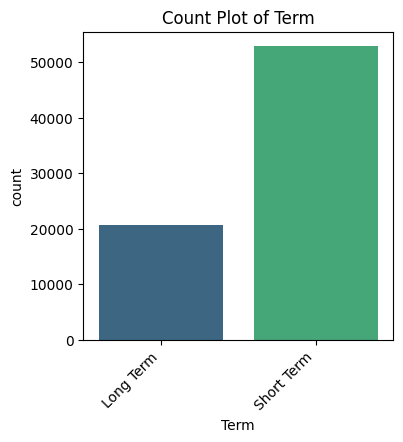

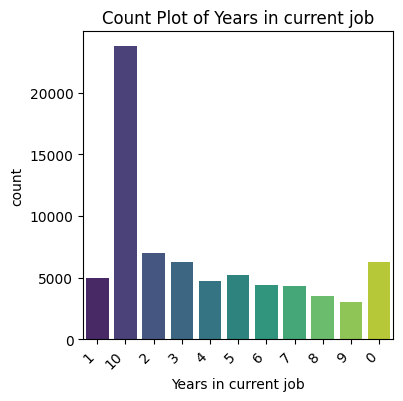

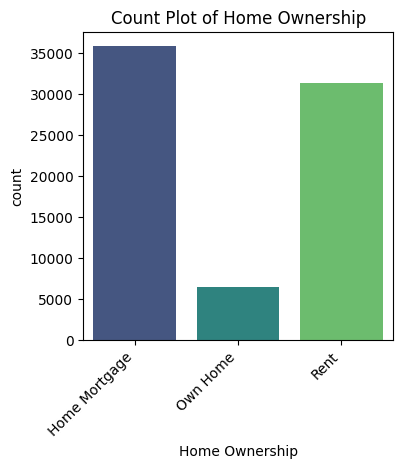

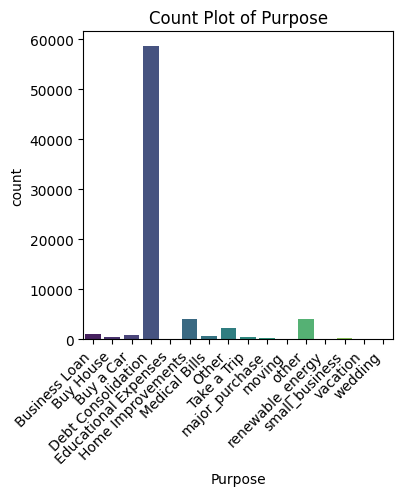

In [95]:
df_cat=df.select_dtypes(include="category")
df_cat.columns

for column in df_cat:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=column, data=df_cat, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [96]:
df_cat=df.select_dtypes(include="category")
df_cat.columns

Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')

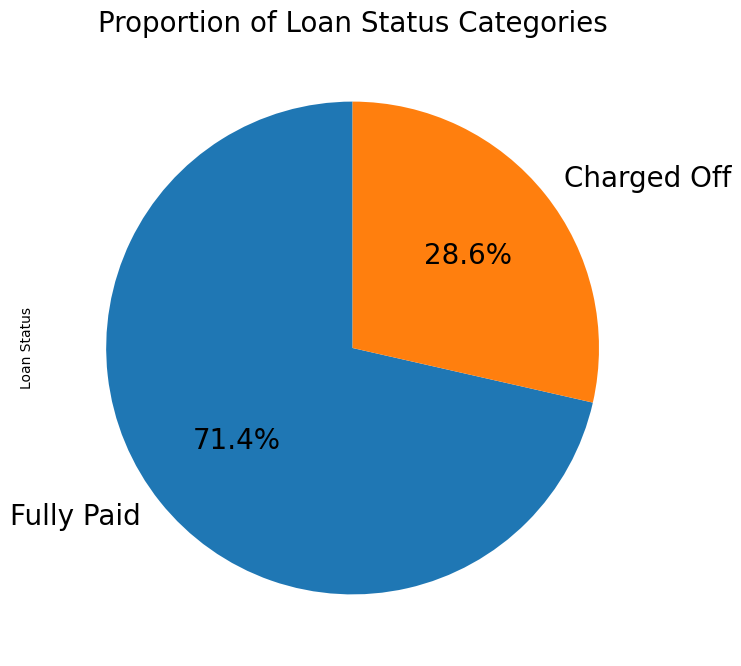

In [97]:
plt.figure(figsize=(8, 8))
df['Loan Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,textprops={'fontsize': 20})
plt.title('Proportion of Loan Status Categories', fontsize=20)
plt.show()

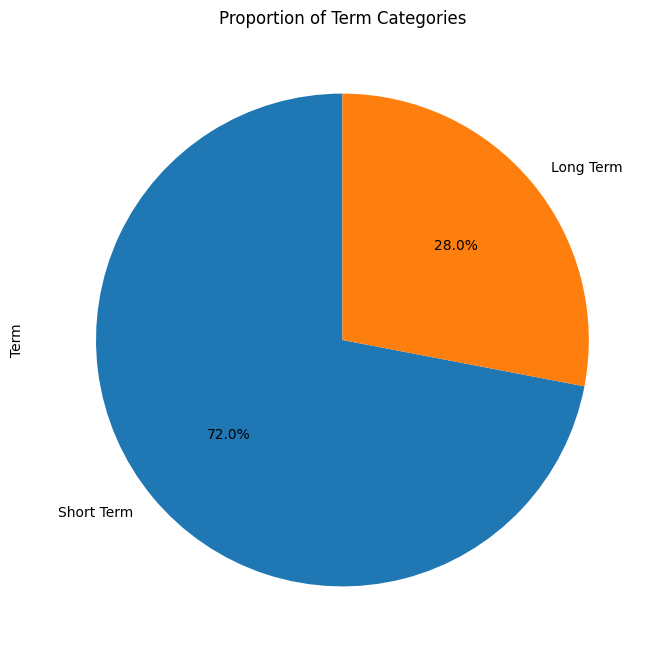

In [98]:
plt.figure(figsize=(8, 8))
df['Term'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Term Categories')
plt.show()

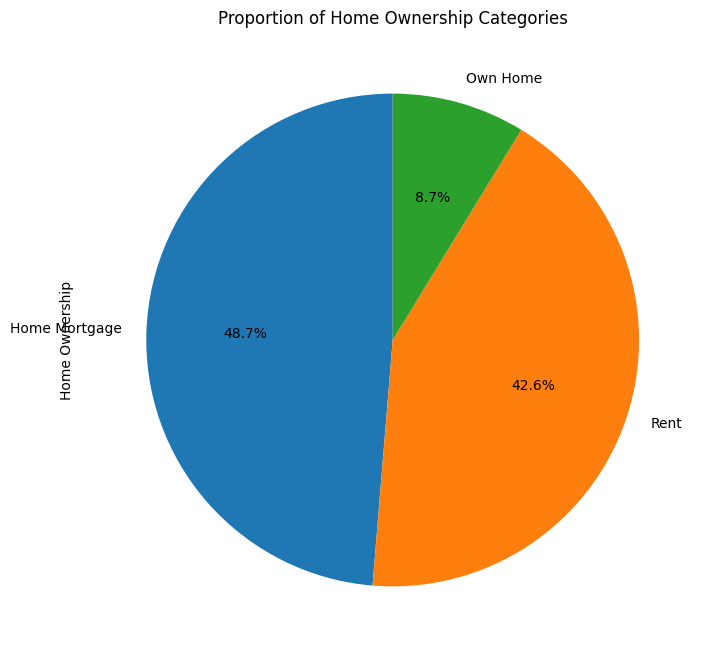

In [99]:
plt.figure(figsize=(8, 8))
df['Home Ownership'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Home Ownership Categories')
plt.show()

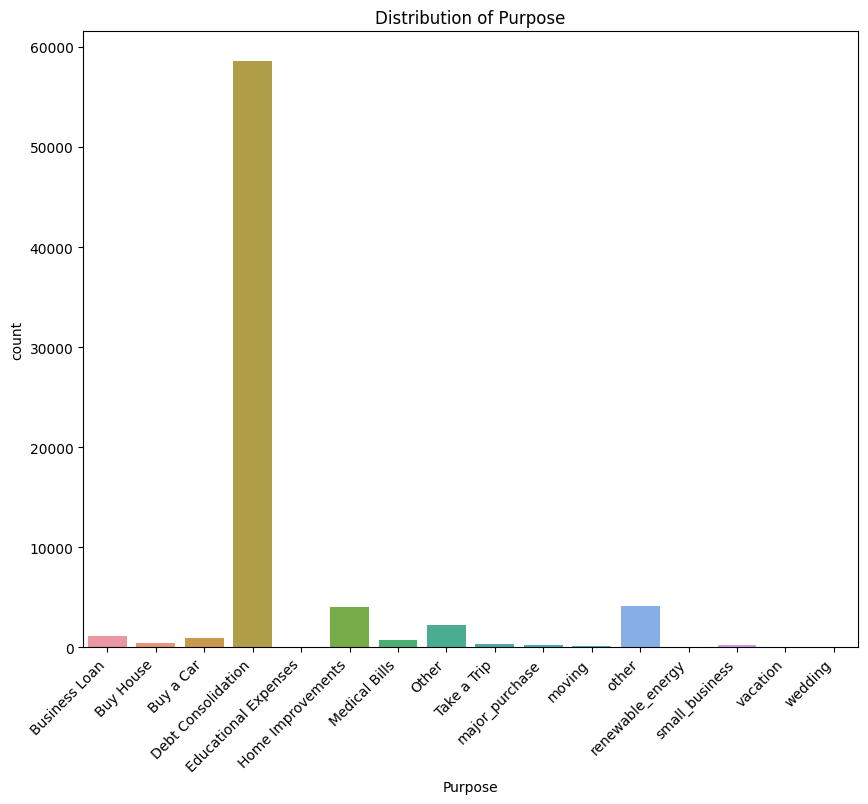

In [100]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Purpose', data=df)
plt.title('Distribution of Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()

insight

# Skewness of Data 

Look at the skewness values you've calculated. Generally, a skewness value between -0.5 and 0.5 is considered approximately symmetric. Beyond that range, you might consider transformation.

In [101]:
print("Skewness before:\n",df_num.skew())

Skewness before:
 Current Loan Amount              0.760292
Credit Score                    -1.738243
Annual Income                    7.393998
Monthly Debt                     1.824510
Years of Credit History          1.012979
Months since last delinquent     1.289579
Number of Open Accounts          1.029975
Number of Credit Problems        5.034915
Current Credit Balance          16.056395
Maximum Open Credit            119.826401
Bankruptcies                     3.571201
Tax Liens                       16.263108
dtype: float64


replace_zero = lambda x: 0.00001 if x == 0 else x
skew_df = df_num.applymap(replace_zero)
skew_df.head()

In [102]:
from sklearn.preprocessing import PowerTransformer
pow_transformer = PowerTransformer(method='yeo-johnson')
skew_df = pow_transformer.fit_transform(df_num)

In [103]:
skew_df=pd.DataFrame(skew_df)
skew_df.columns=df_num.columns
skew_df.head()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0             0.807994     -0.695106      -0.041769     -1.395520   
1            -0.099592      0.074082       0.077951      1.220291   
2             0.361585     -0.143256      -0.896526     -0.843461   
3            -0.675969      0.074082       0.077951      0.357476   
4            -0.380440      0.372655      -0.009639     -0.577278   

   Years of Credit History  Months since last delinquent  \
0                 0.035550                     -0.899269   
1                 0.593108                      0.590150   
2                -0.909374                     -0.899269   
3                -2.542133                     -0.899269   
4                 0.390213                      0.688703   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                -1.176478                   2.567621                0.046844   
1                 3.012369                  -0.389403                0.055523   
2                -0.329903                  -0.389403                0.177573   
3                 0.859347                  -0.389403                0.164798   
4                 0.512644                   2.567621               -0.610389   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0            -0.187756      2.946519  -0.136192  
1             0.649553     -0.339382  -0.136192  
2            -0.270303     -0.339382  -0.136192  
3            -0.160065     -0.339382  -0.136192  
4            -0.651563      2.946519  -0.136192

In [104]:
skew_df.skew()

Current Loan Amount            -0.040823
Credit Score                   -0.127497
Annual Income                  -0.033990
Monthly Debt                    0.054109
Years of Credit History         0.001106
Months since last delinquent    0.284423
Number of Open Accounts         0.000406
Number of Credit Problems       2.178678
Current Credit Balance          0.115866
Maximum Open Credit             0.435853
Bankruptcies                    2.607203
Tax Liens                       7.206519
dtype: float64

In [105]:
skew_df= skew_df.apply(lambda rec:(rec-rec.min())/(rec.max()-rec.min()),axis=0)
skew_df.head()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0             0.762845      0.383018       0.531994      0.225417   
1             0.583072      0.557484       0.540748      0.470261   
2             0.674421      0.508188       0.469496      0.277091   
3             0.468904      0.557484       0.540748      0.389500   
4             0.527442      0.625206       0.534344      0.302006   

   Years of Credit History  Months since last delinquent  \
0                 0.524197                      0.000000   
1                 0.603207                      0.587009   
2                 0.390294                      0.000000   
3                 0.158919                      0.000000   
4                 0.574455                      0.625851   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 0.364583                   0.998937                0.380183   
1                 1.000000                   0.000000                0.380784   
2                 0.493002                   0.000000                0.389229   
3                 0.673402                   0.000000                0.388345   
4                 0.620810                   0.998937                0.334707   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             0.293646      0.999914   0.000000  
1             0.329190      0.000000   0.000000  
2             0.290142      0.000000   0.000000  
3             0.294821      0.000000   0.000000  
4             0.273957      0.999914   0.000000

# Correlation in Features

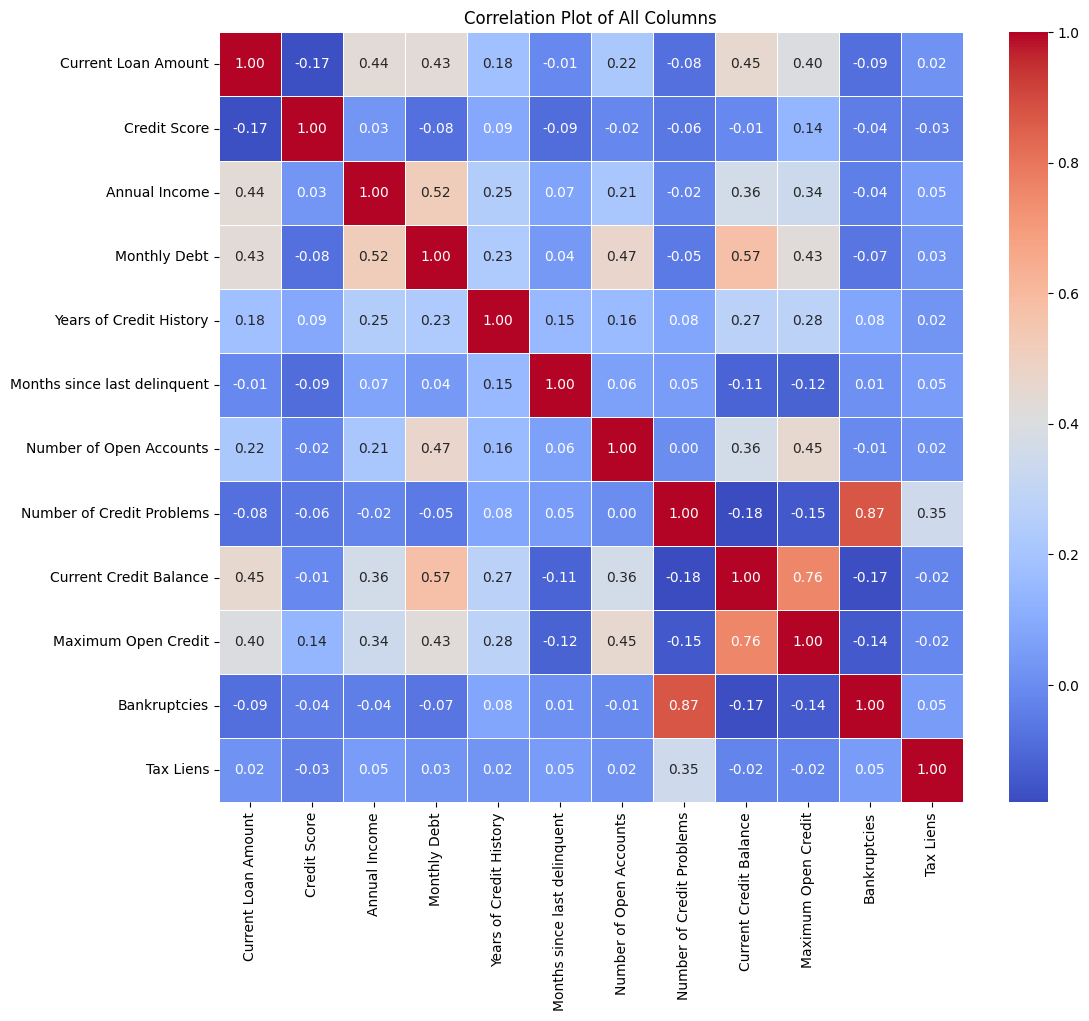

In [106]:
correlation_matrix = skew_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot of All Columns')
plt.show()

highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:  # Set your correlation threshold
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly Correlated Features:", highly_correlated_features)

correlation_threshold = 0.10

highly_correlated_features = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature1, feature2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            highly_correlated_features[(feature1, feature2)] = correlation * 100  


for feature_pair, correlation_percentage in highly_correlated_features.items():
    print(f"{feature_pair[0]} and {feature_pair[1]}: {correlation_percentage:.2f}% correlation")

correlation_threshold = 0.70

highly_correlated_features = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature1, feature2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            highly_correlated_features[(feature1, feature2)] = correlation * 100  # Store percentage


for feature_pair, correlation_percentage in highly_correlated_features.items():
    print(f"{feature_pair[0]} and {feature_pair[1]}: {correlation_percentage:.2f}% correlation")

1. Maximum Open Credit and Current Credit Balance (77.05% correlation):

There is an extremely strong positive correlation between the maximum open credit and the current credit balance. This indicates that individuals with higher maximum open credit limits tend to have higher current credit balances. It's important to note that this correlation doesn't imply causation but suggests a pattern where individuals with larger open credit limits may be utilizing more credit.

2. Bankruptcies and Number of Credit Problems (75.32% correlation):

There is an extremely strong positive correlation between the number of bankruptcies and the number of credit problems. This implies that individuals who have experienced bankruptcies also tend to have a higher number of overall credit problems. This correlation might be expected, as bankruptcies are a significant financial event and could lead to various credit-related issues.

In [107]:
df_cat=df.select_dtypes("category")

In [108]:
df_enco=pd.get_dummies(df_cat, drop_first=True).astype("int")

In [109]:
df_enco.head()

Loan Status_Fully Paid  Term_Short Term  Years in current job_10  \
0                       1                1                        0   
1                       1                1                        1   
2                       1                0                        0   
3                       1                1                        0   
4                       1                1                        0   

   Years in current job_2  Years in current job_3  Years in current job_4  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       1                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Years in current job_5  Years in current job_6  Years in current job_7  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       1                       0                       0   
4                       0                       0                       0   

   Years in current job_8  Years in current job_9  Years in current job_0  \
0                       1                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       1   

   Home Ownership_Own Home  Home Ownership_Rent  Purpose_Buy House  \
0                        0                    0                  0   
1                        0                    0                  0   
2                        1                    0                  0   
3                        0                    1                  0   
4                        0                    0                  0   

   Purpose_Buy a Car  Purpose_Debt Consolidation  \
0                  0                           0   
1                  0                           1   
2                  0                           1   
3                  0                           1   
4                  0                           1   

   Purpose_Educational Expenses  Purpose_Home Improvements  \
0                             0                          1   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Purpose_Medical Bills  Purpose_Other  Purpose_Take a Trip  \
0                      0              0                    0   
1                      0              0                    0   
2                      0              0                    0   
3                      0              0                    0   
4                      0              0                    0   

   Purpose_major_purchase  Purpose_moving  Purpose_other  \
0                       0               0              0   
1                       0               0              0   
2                       0               0              0   
3                       0               0              0   
4                       0               0              0   

   Purpose_renewable_energy  Purpose_small_business  Purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       0                 0   
3                         0               

In [110]:
df=pd.concat([skew_df,df_enco],axis=1)

In [111]:
df.head()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0             0.762845      0.383018       0.531994      0.225417   
1             0.583072      0.557484       0.540748      0.470261   
2             0.674421      0.508188       0.469496      0.277091   
3             0.468904      0.557484       0.540748      0.389500   
4             0.527442      0.625206       0.534344      0.302006   

   Years of Credit History  Months since last delinquent  \
0                 0.524197                      0.000000   
1                 0.603207                      0.587009   
2                 0.390294                      0.000000   
3                 0.158919                      0.000000   
4                 0.574455                      0.625851   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 0.364583                   0.998937                0.380183   
1                 1.000000                   0.000000                0.380784   
2                 0.493002                   0.000000                0.389229   
3                 0.673402                   0.000000                0.388345   
4                 0.620810                   0.998937                0.334707   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status_Fully Paid  \
0             0.293646      0.999914   0.000000                       1   
1             0.329190      0.000000   0.000000                       1   
2             0.290142      0.000000   0.000000                       1   
3             0.294821      0.000000   0.000000                       1   
4             0.273957      0.999914   0.000000                       1   

   Term_Short Term  Years in current job_10  Years in current job_2  \
0                1                        0                       0   
1                1                        1                       0   
2                0                        0                       0   
3                1                        0                       0   
4                1                        0                       0   

   Years in current job_3  Years in current job_4  Years in current job_5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       0   

   Years in current job_6  Years in current job_7  Years in current job_8  \
0                       0                       0                       1   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Years in current job_9  Years in current job_0  Home Ownership_Own Home  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        1   
3                       0                       0                        0   
4                       0                       1                        0   

   Home Ownership_Rent  Purpose_Buy House  Purpose_Buy a Car  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    1                  0                  0   
4                    0                  0                  0   

   Purpose_Debt Consolidation  Purpose_Educational Expenses  \
0                  

In [112]:
df.head()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0             0.762845      0.383018       0.531994      0.225417   
1             0.583072      0.557484       0.540748      0.470261   
2             0.674421      0.508188       0.469496      0.277091   
3             0.468904      0.557484       0.540748      0.389500   
4             0.527442      0.625206       0.534344      0.302006   

   Years of Credit History  Months since last delinquent  \
0                 0.524197                      0.000000   
1                 0.603207                      0.587009   
2                 0.390294                      0.000000   
3                 0.158919                      0.000000   
4                 0.574455                      0.625851   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 0.364583                   0.998937                0.380183   
1                 1.000000                   0.000000                0.380784   
2                 0.493002                   0.000000                0.389229   
3                 0.673402                   0.000000                0.388345   
4                 0.620810                   0.998937                0.334707   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status_Fully Paid  \
0             0.293646      0.999914   0.000000                       1   
1             0.329190      0.000000   0.000000                       1   
2             0.290142      0.000000   0.000000                       1   
3             0.294821      0.000000   0.000000                       1   
4             0.273957      0.999914   0.000000                       1   

   Term_Short Term  Years in current job_10  Years in current job_2  \
0                1                        0                       0   
1                1                        1                       0   
2                0                        0                       0   
3                1                        0                       0   
4                1                        0                       0   

   Years in current job_3  Years in current job_4  Years in current job_5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       0   

   Years in current job_6  Years in current job_7  Years in current job_8  \
0                       0                       0                       1   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Years in current job_9  Years in current job_0  Home Ownership_Own Home  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        1   
3                       0                       0                        0   
4                       0                       1                        0   

   Home Ownership_Rent  Purpose_Buy House  Purpose_Buy a Car  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    1                  0                  0   
4                    0                  0                  0   

   Purpose_Debt Consolidation  Purpose_Educational Expenses  \
0                  

In [113]:
col=df.columns
col

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10', 'Years in current job_2',
       'Years in current job_3', 'Years in current job_4',
       'Years in current job_5', 'Years in current job_6',
       'Years in current job_7', 'Years in current job_8',
       'Years in current job_9', 'Years in current job_0',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose

In [114]:

X=df.drop(['Maximum Open Credit'],axis=1)
y=df['Maximum Open Credit']


X=sm.add_constant(X)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

intial_ols_model=sm.OLS(y_train,X_train).fit()
intial_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Maximum Open Credit   R-squared:                       0.671
Model:                             OLS   Adj. R-squared:                  0.671
Method:                  Least Squares   F-statistic:                     2624.
Date:                 Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                         18:32:12   Log-Likelihood:             1.1805e+05
No. Observations:                51393   AIC:                        -2.360e+05
Df Residuals:                    51352   BIC:                        -2.357e+05
Df Model:                           40                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0928      0.001     65.833      0.000       0.090       0.096
Current Loan Amount              0.0188      0.001     25.829      0.000       0.017       0.020
Credit Score                     0.0311      0.001     56.862      0.000       0.030       0.032
Annual Income                    0.0264      0.002     14.088      0.000       0.023       0.030
Monthly Debt                    -0.0600      0.002    -36.373      0.000      -0.063      -0.057
Years of Credit History          0.0140      0.001     16.343      0.000       0.012       0.016
Months since last delinquent    -0.0048      0.000    -16.930      0.000      -0.005      -0.004
Number of Open Accounts          0.0678      0.001     82.697      0.000       0.066       0.069
Number of Credit Problems       -0.0015      0.001     -1.804      0.071      -0.003       0.000
Current Credit Balance           0.4195      0.002    198.588      0.000       0.415       0.424
Bankruptcies                    -0.0003      0.001     -0.364      0.716      -0.002       0.001
Tax Liens                        0.0018      0.001      1.725      0.085      -0.000       0.004
Loan Status_Fully Paid           0.0031      0.000     12.608      0.000       0.003       0.004
Term_Short Term                 -0.0044      0.000    -15.241      0.000      -0.005      -0.004
Years in current job_10         -0.0006      0.000     -1.338      0.181      -0.002       0.000
Years in current job_2          -0.0001      0.001     -0.256      0.798      -0.001       0.001
Years in current job_3          -0.0007      0.001     -1.280      0.200      -0.002       0.000
Years in current job_4          -0.0006      0.001     -0.970      0.332      -0.002       0.001
Years in current job_5          -0.0006      0.001     -1.010      0.312      -0.002       0.001
Years in current job_6          -0.0018      0.001     -2.967      0.003      -0.003      -0.001
Years in current job_7          -0.0015      0.001     -2.526      0.012      -0.003      -0.000
Years in current job_8          -0.0008      0.001     -1.259      0.208      -0.002       0.000
Years in current job_9          -0.0012      0.001     -1.759      0.079      -0.002       0.000
Years in current job_0          -0.0003      0.001     -0.566      0.571      -0.001       0.001
Home Ownership_Own Home          0.0035      0.000      8.777      0.000       0.003       0.004
Home Ownership_Rent             -0.0009      0.000     -3.469      0.001      -0.001      -0.000
Purpose_Buy House                0.0021      0.002      1.283      0.199      -0.001       0.005
Purpose_Buy a Car               -0.0011      0.001     -0.860      0.390      -0.004       0.001
Purpose_Debt Consolidation      -0.0126      0.001    -14.419    

### Insight

**Model Performance:**

Low R-squared (2.6%) suggests limited explanatory power for Maximum Open Credit.
Adjusted R-squared remains low, indicating marginal improvement with additional variables.
The F-statistic is significant (p-value < 0.05), indicating joint significance of some independent variables.


**Model Assumptions:**

High skewness and kurtosis values suggest potential normality issues in residuals.
The Durbin-Watson statistic indicates no autocorrelation in residuals.

In [115]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)
    
    return rmse_train

def get_test_rmse(model):
    test_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)

    return rmse_test

def get_train_score(model,X_train, y_train):
    
    r_sq = model.rsquared
    
    r_sq_adj = model.rsquared_adj

    return [r_sq, r_sq_adj]

def get_test_score(model, X_test, y_test):
    predictions_test = model.predict(X_test)
    
    r_sq_test = r2_score(y_test, predictions_test)

    n = len(y_test)
    p = X_test.shape[1]  # Number of features in X_test
    adj_r_sq_adj_test = 1 - ((1 - r_sq_test) * (n - 1) / (n - p - 1))
    
    
    return [r_sq_test, adj_r_sq_adj_test]

    


In [116]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared_train','R-Squared_test', 'Adj. R-Squared_train',
                                        'Adj. R-Squared_test', 'RMSE_train', 'RMSE_test'])

def update_score_card(algorithm_name, model):

    global score_card

    new_data = {
        'Model_Name': algorithm_name,
        'R-Squared_train': get_train_score(model,X_train, y_train)[0],
        'R-Squared_test': get_test_score(model, X_test, y_test)[0],
        'Adj. R-Squared_train': get_train_score(model,X_train, y_train)[1],
        'Adj. R-Squared_test': get_test_score(model, X_test, y_test)[1],
        'RMSE_train': get_train_rmse(model),
        'RMSE_test': get_test_rmse(model)
    }


    score_card = pd.concat([score_card, pd.DataFrame([new_data])], ignore_index=True)
    


In [117]:
update_score_card(algorithm_name='OLS Model intial Model', model=intial_ols_model)


score_card


Model_Name  R-Squared_train  R-Squared_test  \
0  OLS Model intial Model         0.671452        0.655653   

   Adj. R-Squared_train  Adj. R-Squared_test  RMSE_train  RMSE_test  
0              0.671196             0.655011    0.024300   0.024900

In [118]:
predictions_test = intial_ols_model.predict(X_test)
    
r_sq = r2_score(y_test, predictions_test)

n = len(y_test)
p = X_test.shape[1]  # Number of features in X_test
adj_r_sq = 1 - ((1 - r_sq) * (n - 1) / (n - p - 1))

print(r_sq)
print(adj_r_sq)

0.6556533561826322
0.6550111521980747


# Normality

In [119]:
from scipy.stats import shapiro

# Extract the residuals from the initial OLS model
residuals = intial_ols_model.resid

# Perform the Shapiro-Wilk test
res_stat, res_p_value = shapiro(residuals)

# Display the results
print("Shapiro-Wilk Test:")
print("Test Statistic:", res_stat)
print("P-value:", res_p_value)

# Interpret the results
alpha = 0.05
if res_p_value > alpha:
    print("The residuals appear to be normally distributed (fail to reject H0)")
else:
    print("The residuals do not appear to be normally distributed (reject H0)")
    
    import matplotlib.pyplot as plt
import scipy.stats as stats



Shapiro-Wilk Test:
Test Statistic: 0.810792088508606
P-value: 0.0
The residuals do not appear to be normally distributed (reject H0)


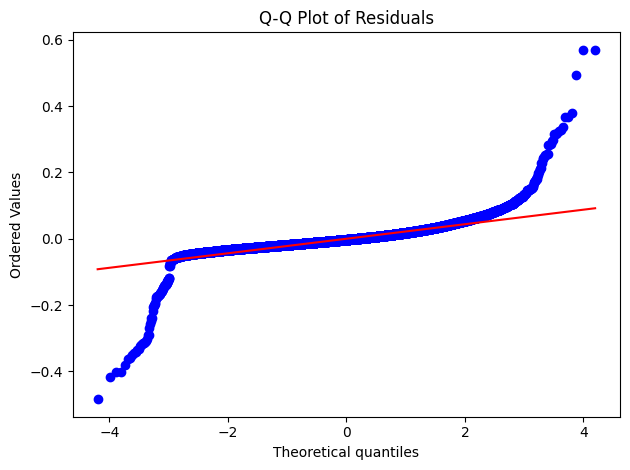

In [120]:
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Multicollinearity

In [121]:
vif_list=[]
for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values,i))
a=pd.DataFrame({'Features':X.columns,'VIF':vif_list})
a.sort_values('VIF', ascending= False)

Features        VIF
0                          const 172.237375
28    Purpose_Debt Consolidation  10.669980
8      Number of Credit Problems   6.978039
10                  Bankruptcies   6.102219
36                 Purpose_other   4.388073
30     Purpose_Home Improvements   4.363115
14       Years in current job_10   4.046098
32                 Purpose_Other   2.869456
15        Years in current job_2   2.172396
4                   Monthly Debt   2.075408
16        Years in current job_3   2.062208
23        Years in current job_0   2.060534
18        Years in current job_5   1.903063
9         Current Credit Balance   1.853102
17        Years in current job_4   1.819620
1            Current Loan Amount   1.796992
27             Purpose_Buy a Car   1.782162
19        Years in current job_6   1.773105
20        Years in current job_7   1.759135
11                     Tax Liens   1.668912
31         Purpose_Medical Bills   1.649454
21        Years in current job_8   1.637913
3                  Annual Income   1.625871
22        Years in current job_9   1.552448
13               Term_Short Term   1.463728
26             Purpose_Buy House   1.399769
2                   Credit Score   1.336597
7        Number of Open Accounts   1.332779
33           Purpose_Take a Trip   1.332639
25           Home Ownership_Rent   1.279757
5        Years of Credit History   1.272444
34        Purpose_major_purchase   1.222898
38        Purpose_small_business   1.179067
24       Home Ownership_Own Home   1.099082
6   Months since last delinquent   1.099061
35                Purpose_moving   1.087265
40               Purpose_wedding   1.070130
39              Purpose_vacation   1.063633
12        Loan Status_Fully Paid   1.063571
29  Purpose_Educational Expenses   1.059028
37      Purpose_renewable_energy   1.007426

### Insight

**Variance Inflation Factor (VIF) Interpretation:**
    
VIF measures the extent of multicollinearity in a set of variables.
Generally, a VIF value above 10 is considered indicative of multicollinearity.


1. High Multicollinearity:


Purpose_Debt Consolidation has a relatively high VIF of 10.67.

2. Moderate Multicollinearity:

Number of Credit Problems, Bankruptcies, Purpose_other, Purpose_Home Improvements, and Years in current job_10 have moderate VIF values.

3. Low Multicollinearity:

Many features have VIF values below 2, suggesting low multicollinearity.
These include features like Current Loan Amount, Monthly Debt, Tax Liens, Years in current job categories, and more.

In [122]:
X=X.drop(['Purpose_Debt Consolidation'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

vif_ols_model=sm.OLS(y_train,X_train).fit()
print(vif_ols_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Maximum Open Credit   R-squared:                       0.670
Model:                             OLS   Adj. R-squared:                  0.670
Method:                  Least Squares   F-statistic:                     2675.
Date:                 Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                         18:32:24   Log-Likelihood:             1.1795e+05
No. Observations:                51393   AIC:                        -2.358e+05
Df Residuals:                    51353   BIC:                        -2.355e+05
Df Model:                           39                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

### Insight 

**Updated Model after Removing High VIF Feature**

1. Multicollinearity Management:

The removal of "Purpose_Debt Consolidation" aimed to mitigate multicollinearity issues.
Assess the impact on the stability and interpretability of the model.

2. Model Performance:

R-squared remains at 44.7%, indicating that the model explains a significant portion of the variance in Maximum Open Credit.

In [123]:
update_score_card(algorithm_name='OLS Model After VIF Feature drop', model=vif_ols_model)


score_card

Model_Name  R-Squared_train  R-Squared_test  \
0            OLS Model intial Model         0.671452        0.655653   
1  OLS Model After VIF Feature drop         0.670122        0.655351   

   Adj. R-Squared_train  Adj. R-Squared_test  RMSE_train  RMSE_test  
0              0.671196             0.655011    0.024300   0.024900  
1              0.669871             0.654724    0.024400   0.024900

In [124]:
vif_list=[]
for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values,i))
a=pd.DataFrame({'Features':X.columns,'VIF':vif_list})
a.sort_values('VIF', ascending= False)

Features        VIF
0                          const 109.561304
8      Number of Credit Problems   6.977976
10                  Bankruptcies   6.101394
14       Years in current job_10   4.045472
15        Years in current job_2   2.172373
4                   Monthly Debt   2.071801
16        Years in current job_3   2.062151
23        Years in current job_0   2.060495
18        Years in current job_5   1.903046
9         Current Credit Balance   1.852186
17        Years in current job_4   1.819609
1            Current Loan Amount   1.796893
19        Years in current job_6   1.773064
20        Years in current job_7   1.759135
11                     Tax Liens   1.668907
21        Years in current job_8   1.637909
3                  Annual Income   1.620672
22        Years in current job_9   1.552371
13               Term_Short Term   1.462376
7        Number of Open Accounts   1.331901
2                   Credit Score   1.330388
25           Home Ownership_Rent   1.279439
5        Years of Credit History   1.271602
24       Home Ownership_Own Home   1.099048
6   Months since last delinquent   1.098894
12        Loan Status_Fully Paid   1.062676
35                 Purpose_other   1.062560
29     Purpose_Home Improvements   1.059975
31                 Purpose_Other   1.034004
27             Purpose_Buy a Car   1.020293
30         Purpose_Medical Bills   1.015869
32           Purpose_Take a Trip   1.011789
26             Purpose_Buy House   1.007622
33        Purpose_major_purchase   1.005119
37        Purpose_small_business   1.003885
34                Purpose_moving   1.003801
38              Purpose_vacation   1.002868
28  Purpose_Educational Expenses   1.002479
39               Purpose_wedding   1.001925
36      Purpose_renewable_energy   1.000625

# Autocorrelation

In [125]:
residuals = vif_ols_model.resid

db_test_stat = durbin_watson(residuals)


print("db_test_stat:",db_test_stat)

if db_test_stat < 1.5:
    print('Positive autocorrelation detected.')
elif db_test_stat > 2.5:
    print('Negative autocorrelation detected.')
else:
    print('No significant autocorrelation detected.')

db_test_stat: 2.0077699846850807
No significant autocorrelation detected.


### Insight 

Durbin-Watson Statistic: The calculated Durbin-Watson Statistic is approximately 2.004 , suggesting no significant autocorrelation.

Interpretation: A value around 2 indicates no substantial autocorrelation. In this case, the statistic being very close to 2 provides confidence that the residuals do not exhibit a systematic pattern.

# Constant Variance Test

**Null Hypothesis (H0): The variance of the residuals is constant (homoscedasticity).**

**Alternative Hypothesis (H1): The variance of the residuals is not constant (heteroscedasticity).**

In [126]:
residuals = vif_ols_model.resid
exog_vars = X_train  # Replace with your actual exogenous variables

het_test_stat, het_p_value, _, _ = het_breuschpagan(residuals, exog_het=exog_vars)

if het_p_value < 0.05:
    print('Reject the null hypothesis: Evidence of heteroscedasticity')
else:
    print('Fail to reject the null hypothesis: No evidence of heteroscedasticity')


Reject the null hypothesis: Evidence of heteroscedasticity


# Insight 

 Presence of Heteroscedasticity:

The test suggests that there is evidence of heteroscedasticity in the residuals of our regression model.
Heteroscedasticity violates one of the assumptions of classical linear regression, which assumes constant variance of the residuals.

# Sequential Feature Selection - Forward("best")

In [127]:
linreg = LinearRegression()

sfs_forward_best = sfs(estimator=linreg, k_features = "best", forward=True,
                     verbose=0, scoring='r2')

lr_sfs_forward_best = sfs_forward_best.fit(X_train,y_train)

In [128]:
lr_sfs_forward_best.k_feature_names_


('const',
 'Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Bankruptcies',
 'Tax Liens',
 'Loan Status_Fully Paid',
 'Term_Short Term',
 'Years in current job_2',
 'Years in current job_3',
 'Years in current job_6',
 'Years in current job_7',
 'Years in current job_0',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_Buy House',
 'Purpose_Buy a Car',
 'Purpose_Home Improvements',
 'Purpose_Medical Bills',
 'Purpose_Other',
 'Purpose_Take a Trip',
 'Purpose_major_purchase',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_small_business',
 'Purpose_vacation',
 'Purpose_wedding')

In [129]:
X=X[list(lr_sfs_forward_best.k_feature_names_)]

In [130]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

LR = LinearRegression()


lr_fs_forward_model=LR.fit(X_train, y_train)

In [131]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)
    
    return(rmse_train)

def get_test_rmse(model):
    

    test_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)

    return(rmse_test)

def get_test_score(model,X_train, y_train):
    
    r_sq = model.score(X_test, y_test)
    
    n = X_test.shape[0]
    
    k = X_test.shape[1]
 
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    

    return ([r_sq, r_sq_adj])

def get_train_score(model,X_train, y_train):
    
    r_sq = model.score(X_train, y_train)
    
    n = X_train.shape[0]
    
    k = X_train.shape[1]
 
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    

    return ([r_sq, r_sq_adj])





In [132]:
update_score_card(algorithm_name='LR model- SRS Forward("best")', model=lr_fs_forward_model)


score_card

Model_Name  R-Squared_train  R-Squared_test  \
0            OLS Model intial Model         0.671452        0.655653   
1  OLS Model After VIF Feature drop         0.670122        0.655351   
2     LR model- SRS Forward("best")         0.670086        0.655416   

   Adj. R-Squared_train  Adj. R-Squared_test  RMSE_train  RMSE_test  
0              0.671196             0.655011    0.024300   0.024900  
1              0.669871             0.654724    0.024400   0.024900  
2              0.669874             0.654899    0.024400   0.024900

# Insight 
**SRS Forward-("best")**

R-squared (R²): The R-squared value indicates that the model explains approximately 44.7% of the variance in the dependent variable. This value represents the goodness of fit.

Adjusted R-squared: Similar to R-squared but adjusted for the number of predictors in the model.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the model. The very low p-value (close to zero) suggests that the overall model is significant.

Log-Likelihood, AIC, BIC: These are information criteria. Lower AIC and BIC values are generally preferred. The model with the lowest AIC and BIC is considered the best.

# Sequential Feature Selection - Backward("best")

In [133]:

linreg = LinearRegression()


sfs_backward_best = sfs(estimator=linreg, k_features = 'best', forward=False,
                     verbose=0, scoring='r2')

lr_sfs_backward_best = sfs_backward_best.fit(X_train,y_train)

In [134]:
print('Features selelected using backword selection are: ')
lr_sfs_backward_best.k_feature_names_

Features selelected using backword selection are: 


('const',
 'Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Tax Liens',
 'Loan Status_Fully Paid',
 'Term_Short Term',
 'Years in current job_2',
 'Years in current job_6',
 'Years in current job_7',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_Buy House',
 'Purpose_Buy a Car',
 'Purpose_Home Improvements',
 'Purpose_Medical Bills',
 'Purpose_Other',
 'Purpose_Take a Trip',
 'Purpose_major_purchase',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_small_business',
 'Purpose_vacation',
 'Purpose_wedding')

In [135]:
df.head()

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0             0.762845      0.383018       0.531994      0.225417   
1             0.583072      0.557484       0.540748      0.470261   
2             0.674421      0.508188       0.469496      0.277091   
3             0.468904      0.557484       0.540748      0.389500   
4             0.527442      0.625206       0.534344      0.302006   

   Years of Credit History  Months since last delinquent  \
0                 0.524197                      0.000000   
1                 0.603207                      0.587009   
2                 0.390294                      0.000000   
3                 0.158919                      0.000000   
4                 0.574455                      0.625851   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 0.364583                   0.998937                0.380183   
1                 1.000000                   0.000000                0.380784   
2                 0.493002                   0.000000                0.389229   
3                 0.673402                   0.000000                0.388345   
4                 0.620810                   0.998937                0.334707   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status_Fully Paid  \
0             0.293646      0.999914   0.000000                       1   
1             0.329190      0.000000   0.000000                       1   
2             0.290142      0.000000   0.000000                       1   
3             0.294821      0.000000   0.000000                       1   
4             0.273957      0.999914   0.000000                       1   

   Term_Short Term  Years in current job_10  Years in current job_2  \
0                1                        0                       0   
1                1                        1                       0   
2                0                        0                       0   
3                1                        0                       0   
4                1                        0                       0   

   Years in current job_3  Years in current job_4  Years in current job_5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       0   

   Years in current job_6  Years in current job_7  Years in current job_8  \
0                       0                       0                       1   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Years in current job_9  Years in current job_0  Home Ownership_Own Home  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        1   
3                       0                       0                        0   
4                       0                       1                        0   

   Home Ownership_Rent  Purpose_Buy House  Purpose_Buy a Car  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    1                  0                  0   
4                    0                  0                  0   

   Purpose_Debt Consolidation  Purpose_Educational Expenses  \
0                  

In [136]:
df=sm.add_constant(df)
df.head()

const  Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0 1.000000             0.762845      0.383018       0.531994      0.225417   
1 1.000000             0.583072      0.557484       0.540748      0.470261   
2 1.000000             0.674421      0.508188       0.469496      0.277091   
3 1.000000             0.468904      0.557484       0.540748      0.389500   
4 1.000000             0.527442      0.625206       0.534344      0.302006   

   Years of Credit History  Months since last delinquent  \
0                 0.524197                      0.000000   
1                 0.603207                      0.587009   
2                 0.390294                      0.000000   
3                 0.158919                      0.000000   
4                 0.574455                      0.625851   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 0.364583                   0.998937                0.380183   
1                 1.000000                   0.000000                0.380784   
2                 0.493002                   0.000000                0.389229   
3                 0.673402                   0.000000                0.388345   
4                 0.620810                   0.998937                0.334707   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status_Fully Paid  \
0             0.293646      0.999914   0.000000                       1   
1             0.329190      0.000000   0.000000                       1   
2             0.290142      0.000000   0.000000                       1   
3             0.294821      0.000000   0.000000                       1   
4             0.273957      0.999914   0.000000                       1   

   Term_Short Term  Years in current job_10  Years in current job_2  \
0                1                        0                       0   
1                1                        1                       0   
2                0                        0                       0   
3                1                        0                       0   
4                1                        0                       0   

   Years in current job_3  Years in current job_4  Years in current job_5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       0   

   Years in current job_6  Years in current job_7  Years in current job_8  \
0                       0                       0                       1   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Years in current job_9  Years in current job_0  Home Ownership_Own Home  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        1   
3                       0                       0                        0   
4                       0                       1                        0   

   Home Ownership_Rent  Purpose_Buy House  Purpose_Buy a Car  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    1                  0                  0   
4                    0                  0                  0   

   Purpose_Debt Consolidation 

In [137]:
X=df[list(lr_sfs_backward_best.k_feature_names_)]

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)


lr_fs_backward_model=LR.fit(X_train, y_train)

In [139]:
update_score_card(algorithm_name='LR model- SRS Backward("best")', model=lr_fs_backward_model)


score_card

Model_Name  R-Squared_train  R-Squared_test  \
0            OLS Model intial Model         0.671452        0.655653   
1  OLS Model After VIF Feature drop         0.670122        0.655351   
2     LR model- SRS Forward("best")         0.670086        0.655416   
3    LR model- SRS Backward("best")         0.670078        0.655447   

   Adj. R-Squared_train  Adj. R-Squared_test  RMSE_train  RMSE_test  
0              0.671196             0.655011    0.024300   0.024900  
1              0.669871             0.654724    0.024400   0.024900  
2              0.669874             0.654899    0.024400   0.024900  
3              0.669886             0.654977    0.024400   0.024900

# Insight

The OLS regression model after applying Sequential Feature Selection (SFS) backward elimination for the best features shows a good fit with an R-squared value of 0.447. The adjusted R-squared value is also 0.447, indicating that the selected features explain a substantial portion of the variance in the target variable.

The significant features in the model include:


Current Loan Amount

Credit Score

Annual Income

Monthly Debt

Years of Credit History

Months since last delinquent

Number of Open Accounts

Current Credit Balance

Loan Status_Fully Paid

Term_Short Term

Years in current job (various categories)

Home Ownership (Own Home, Rent)

Purpose (Buy House, Buy a Car, Home Improvements, Medical Bills, Other, Take a Trip, major_purchase, moving, small_business, vacation, wedding)



# Recursive Feature Elimination (RFE)

In [140]:
linreg = LinearRegression()
X=df.drop(['Maximum Open Credit'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
# Use "None" to automatically select the optimal number of features based on cross-validation
rfe = RFE(estimator=linreg, n_features_to_select=None)

lr_rfe_feature = rfe.fit(X_train, y_train)

In [141]:
selected_features = X_train.columns[lr_rfe_feature.support_]
selected_features

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance', 'Tax Liens',
       'Loan Status_Fully Paid', 'Term_Short Term', 'Home Ownership_Own Home',
       'Purpose_Buy House', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Medical Bills',
       'Purpose_Take a Trip', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy'],
      dtype='object')

In [142]:

X = df[selected_features]
  # Replace 'your_target_column' with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a new Linear Regression model using only the selected features

lr_fs_rfe_model=LR.fit(X_train, y_train)





In [143]:
update_score_card(algorithm_name='LR RFE  model', model=lr_fs_rfe_model)


score_card

Model_Name  R-Squared_train  R-Squared_test  \
0            OLS Model intial Model         0.671452        0.655653   
1  OLS Model After VIF Feature drop         0.670122        0.655351   
2     LR model- SRS Forward("best")         0.670086        0.655416   
3    LR model- SRS Backward("best")         0.670078        0.655447   
4                     LR RFE  model         0.671039        0.655320   

   Adj. R-Squared_train  Adj. R-Squared_test  RMSE_train  RMSE_test  
0              0.671196             0.655011    0.024300   0.024900  
1              0.669871             0.654724    0.024400   0.024900  
2              0.669874             0.654899    0.024400   0.024900  
3              0.669886             0.654977    0.024400   0.024900  
4              0.670911             0.655007    0.024300   0.024900

### Insight

The LR RFE (Linear Regression Recursive Feature Elimination) model was developed with the goal of feature selection to enhance the predictive performance of the linear regression model. The key metrics for both the training and testing datasets are summarized below:

R-Squared (R2):


Training Set: 15.49%

Adjusted R-Squared (Adj. R2) - Training Set: 15.46%
Test Set: 11.08%

Adjusted R-Squared (Adj. R2) - Test Set: 10.92%

The R-squared values indicate the proportion of the variance in the dependent variable that is predictable from the independent 

variables. In this case, the model explains approximately 15.49% of the variance in the training set and 11.08% in the test set.

Root Mean Squared Error (RMSE):


RMSE - Training Set: 411.38

RMSE - Test Set: 499.98

The RMSE values represent the average magnitude of the errors between predicted and actual values. Lower RMSE values indicate 

better model performance. In this scenario, the model has an RMSE of 411.38 on the training set and 499.98 on the test set.


In [144]:
X=df[list(lr_sfs_backward_best.k_feature_names_)]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=linreg, n_features_to_select=n_features)
    scores = cross_val_score(rfe, X_train, y_train, cv=5)  
    print(f'Number of features: {n_features}, Cross-validated R^2: {scores.mean()}')

Number of features: 1, Cross-validated R^2: 0.5802536213735507
Number of features: 2, Cross-validated R^2: 0.6159159502527253
Number of features: 3, Cross-validated R^2: 0.6225512314332201
Number of features: 4, Cross-validated R^2: 0.6309223698088567
Number of features: 5, Cross-validated R^2: 0.6503543632083769
Number of features: 6, Cross-validated R^2: 0.6556525128974221
Number of features: 7, Cross-validated R^2: 0.6569632385338535
Number of features: 8, Cross-validated R^2: 0.6574078405081353
Number of features: 9, Cross-validated R^2: 0.6581361140711083
Number of features: 10, Cross-validated R^2: 0.6583819271001522
Number of features: 11, Cross-validated R^2: 0.6590210414213716
Number of features: 12, Cross-validated R^2: 0.6603295824055425
Number of features: 13, Cross-validated R^2: 0.6619934827291221
Number of features: 14, Cross-validated R^2: 0.6624467096333747
Number of features: 15, Cross-validated R^2: 0.6627619498571635
Number of features: 16, Cross-validated R^2: 0.66

# Lasso

In [145]:
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')

lasso_grid_model = grid_search.fit(X_train, y_train)


In [146]:
print("Best Alpha:", grid_search.best_params_)

Best Alpha: {'alpha': 0.001}


In [147]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [148]:
r_squared = lasso_model.score(X_train, y_train)
r_squared

0.0

In [149]:
all_lasso_features_with_coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_model.coef_})

print("All Features with Coefficients from Lasso:")
print(all_lasso_features_with_coef)

All Features with Coefficients from Lasso:
                         Feature  Coefficient
0                          const     0.000000
1            Current Loan Amount     0.000000
2                   Credit Score     0.000000
3                  Annual Income     0.000000
4                   Monthly Debt     0.000000
5        Years of Credit History     0.000000
6   Months since last delinquent    -0.000000
7        Number of Open Accounts     0.000000
8      Number of Credit Problems    -0.000000
9         Current Credit Balance     0.000000
10                     Tax Liens    -0.000000
11        Loan Status_Fully Paid     0.000000
12               Term_Short Term    -0.000000
13        Years in current job_2    -0.000000
14        Years in current job_6    -0.000000
15        Years in current job_7    -0.000000
16       Home Ownership_Own Home     0.000000
17           Home Ownership_Rent    -0.000000
18             Purpose_Buy House    -0.000000
19             Purpose_Buy a Car    -

In [150]:
selected_features_lasso = X_train.columns[lasso_model.coef_ != 0]

selected_features_lasso


Index([], dtype='object')

In [151]:
X=df[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Number of Open Accounts', 'Current Credit Balance',
       'Years in current job_10', 'Years in current job_3',
       'Years in current job_7', 'Years in current job_9', 'Purpose_Buy House',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_major_purchase']]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


lr_lasso_feature_model=LR.fit(X_train, y_train)

In [153]:
update_score_card(algorithm_name='LR lasso Selected Feature model', model=lr_lasso_feature_model)


score_card

Model_Name  R-Squared_train  R-Squared_test  \
0            OLS Model intial Model         0.671452        0.655653   
1  OLS Model After VIF Feature drop         0.670122        0.655351   
2     LR model- SRS Forward("best")         0.670086        0.655416   
3    LR model- SRS Backward("best")         0.670078        0.655447   
4                     LR RFE  model         0.671039        0.655320   
5   LR lasso Selected Feature model         0.658742        0.644341   

   Adj. R-Squared_train  Adj. R-Squared_test  RMSE_train  RMSE_test  
0              0.671196             0.655011    0.024300   0.024900  
1              0.669871             0.654724    0.024400   0.024900  
2              0.669874             0.654899    0.024400   0.024900  
3              0.669886             0.654977    0.024400   0.024900  
4              0.670911             0.655007    0.024300   0.024900  
5              0.658642             0.644099    0.024800   0.025300

# Ridge

In [154]:
X=df[list(lr_sfs_backward_best.k_feature_names_)]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

ridge_grid_model = ridge_grid_search.fit(X_train, y_train)

In [155]:
print("Best Alpha:", grid_search.best_params_)

Best Alpha: {'alpha': 0.001}


In [156]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [157]:
r_squared = lasso_model.score(X_train, y_train)
r_squared

0.0

In [158]:
all_ridge_features_with_coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_model.coef_})

print("All Features with Coefficients from Lasso:")
print(all_ridge_features_with_coef)

All Features with Coefficients from Lasso:
                         Feature  Coefficient
0                          const     0.000000
1            Current Loan Amount     0.018884
2                   Credit Score     0.030592
3                  Annual Income     0.027966
4                   Monthly Debt    -0.061201
5        Years of Credit History     0.014195
6   Months since last delinquent    -0.004897
7        Number of Open Accounts     0.067424
8      Number of Credit Problems    -0.001888
9         Current Credit Balance     0.418834
10                     Tax Liens     0.002098
11        Loan Status_Fully Paid     0.003003
12               Term_Short Term    -0.004300
13        Years in current job_2     0.000459
14        Years in current job_6    -0.001215
15        Years in current job_7    -0.000968
16       Home Ownership_Own Home     0.003476
17           Home Ownership_Rent    -0.000861
18             Purpose_Buy House     0.014343
19             Purpose_Buy a Car     

**Cross Validation**

In [159]:
#Cross Validation for "12" Features

LR=LinearRegression()

kfold=KFold(n_splits=5, shuffle=True, random_state=1)

cv_model= cross_val_score(estimator=LR, X=X_train,y=y_train, scoring="r2", cv=kfold)



print("Cross-validated R2 scores:", cv_model)


print("Mean R2 score:", np.mean(cv_model))


Cross-validated R2 scores: [0.65645387 0.66671465 0.69387273 0.67331403 0.65926304]
Mean R2 score: 0.6699236639129007


In [160]:
update_score_card(algorithm_name='Ridge model', model=ridge_grid_model)


score_card

Model_Name  R-Squared_train  R-Squared_test  \
0            OLS Model intial Model         0.671452        0.655653   
1  OLS Model After VIF Feature drop         0.670122        0.655351   
2     LR model- SRS Forward("best")         0.670086        0.655416   
3    LR model- SRS Backward("best")         0.670078        0.655447   
4                     LR RFE  model         0.671039        0.655320   
5   LR lasso Selected Feature model         0.658742        0.644341   
6                       Ridge model         0.670078        0.655448   

   Adj. R-Squared_train  Adj. R-Squared_test  RMSE_train  RMSE_test  
0              0.671196             0.655011    0.024300   0.024900  
1              0.669871             0.654724    0.024400   0.024900  
2              0.669874             0.654899    0.024400   0.024900  
3              0.669886             0.654977    0.024400   0.024900  
4              0.670911             0.655007    0.024300   0.024900  
5              0.658642             0.644099    0.024800   0.025300  
6              0.669886             0.654978    0.024400   0.024900

In [161]:
score_card.style.highlight_max(color = 'lightblue', subset = 'R-Squared_train')

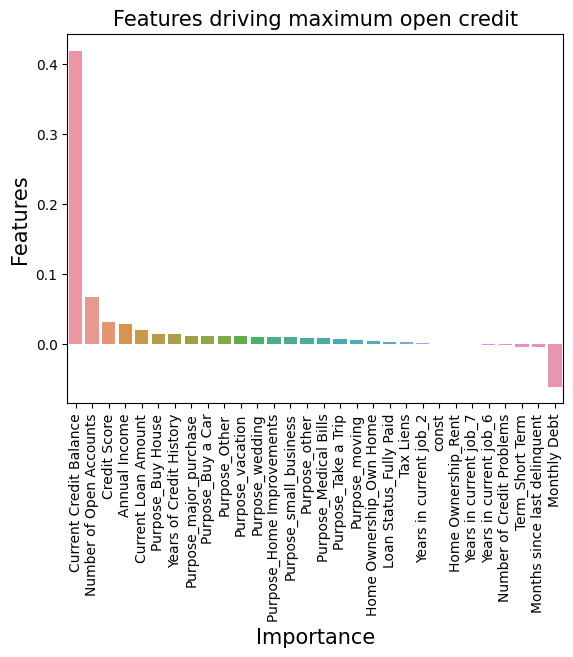

In [162]:
all_ridge_features_with_coef=all_ridge_features_with_coef.sort_values('Coefficient', ascending=False)
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Feature', y = 'Coefficient', data = all_ridge_features_with_coef)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Features driving maximum open credit', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.xticks(rotation=90)
# display the plot
plt.show()

# Classification

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from pandas.api.types import is_string_dtype
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [164]:
df.head()

const  Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0 1.000000             0.762845      0.383018       0.531994      0.225417   
1 1.000000             0.583072      0.557484       0.540748      0.470261   
2 1.000000             0.674421      0.508188       0.469496      0.277091   
3 1.000000             0.468904      0.557484       0.540748      0.389500   
4 1.000000             0.527442      0.625206       0.534344      0.302006   

   Years of Credit History  Months since last delinquent  \
0                 0.524197                      0.000000   
1                 0.603207                      0.587009   
2                 0.390294                      0.000000   
3                 0.158919                      0.000000   
4                 0.574455                      0.625851   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                 0.364583                   0.998937                0.380183   
1                 1.000000                   0.000000                0.380784   
2                 0.493002                   0.000000                0.389229   
3                 0.673402                   0.000000                0.388345   
4                 0.620810                   0.998937                0.334707   

   Maximum Open Credit  Bankruptcies  Tax Liens  Loan Status_Fully Paid  \
0             0.293646      0.999914   0.000000                       1   
1             0.329190      0.000000   0.000000                       1   
2             0.290142      0.000000   0.000000                       1   
3             0.294821      0.000000   0.000000                       1   
4             0.273957      0.999914   0.000000                       1   

   Term_Short Term  Years in current job_10  Years in current job_2  \
0                1                        0                       0   
1                1                        1                       0   
2                0                        0                       0   
3                1                        0                       0   
4                1                        0                       0   

   Years in current job_3  Years in current job_4  Years in current job_5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       0   

   Years in current job_6  Years in current job_7  Years in current job_8  \
0                       0                       0                       1   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Years in current job_9  Years in current job_0  Home Ownership_Own Home  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        1   
3                       0                       0                        0   
4                       0                       1                        0   

   Home Ownership_Rent  Purpose_Buy House  Purpose_Buy a Car  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    1                  0                  0   
4                    0                  0                  0   

   Purpose_Debt Consolidation 

In [165]:
#Initial model
X=df.drop(['Loan Status_Fully Paid'], axis=1)
y=df['Loan Status_Fully Paid']
X_train_init, X_test, y_train_init, y_test = train_test_split(X,y, test_size=0.2, random_state=50)


In [166]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train, y_train = smote.fit_resample(X_train_init, y_train_init)


In [167]:
logreg=sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.646773
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     Loan Status_Fully Paid   No. Observations:                83766
Model:                              Logit   Df Residuals:                    83725
Method:                               MLE   Df Model:                           40
Date:                    Mon, 12 Feb 2024   Pseudo R-squ.:                 0.06690
Time:                            18:37:38   Log-Likelihood:                -54178.
converged:                           True   LL-Null:                       -58062.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.7420 

In [168]:
#Logistic Regression Coefficients

df_odds=pd.DataFrame(np.exp(logreg.params), columns=['Odds'])
df_odds= df_odds.sort_values('Odds', ascending=False)
df_odds

Odds
Maximum Open Credit          3340.737132
Annual Income                 330.362186
Purpose_Educational Expenses    6.103724
Purpose_Buy a Car               4.349939
Purpose_wedding                 4.132313
Purpose_Take a Trip             3.855172
Purpose_Buy House               3.550484
Purpose_moving                  3.396732
Credit Score                    3.045981
Purpose_Other                   2.872327
Purpose_Debt Consolidation      2.784365
Purpose_major_purchase          2.686513
Purpose_vacation                2.456180
Purpose_Home Improvements       2.428395
Purpose_other                   2.266076
Purpose_Medical Bills           2.065442
Term_Short Term                 1.528420
Purpose_small_business          1.275727
Years of Credit History         1.241113
Years in current job_3          1.240326
Years in current job_2          1.155211
Years in current job_4          1.139112
Years in current job_10         1.126966
Years in current job_5          1.120106
Purpose_renewable_energy        1.112529
Years in current job_0          1.091859
Years in current job_8          1.080919
Years in current job_7          1.074897
Years in current job_6          1.074019
Years in current job_9          1.073136
Months since last delinquent    1.050026
Bankruptcies                    1.036760
Number of Credit Problems       1.001499
Home Ownership_Own Home         0.937005
Tax Liens                       0.878052
Home Ownership_Rent             0.789499
Number of Open Accounts         0.415397
Current Loan Amount             0.414571
Monthly Debt                    0.218001
Current Credit Balance          0.041362
const                           0.008721

In [169]:
y_pred_prob= logreg.predict(X_test)
y_pred= [0 if x<0.5 else 1 for x in y_pred_prob]

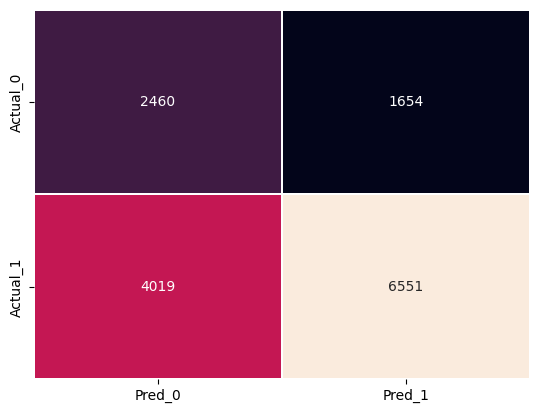

In [170]:
cm=confusion_matrix(y_test, y_pred)
conf_matrix= pd.DataFrame(data=cm, columns= ['Pred_0', 'Pred_1'], index=['Actual_0', 'Actual_1'])
sns.heatmap(conf_matrix, annot=True, fmt='d',  cbar=False, linewidth=0.2)
plt.show()

In [171]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [172]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [173]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)
    # return the classification report for test data
    return(classification_report(y_test, test_pred))


In [212]:
classification_score_card = pd.DataFrame(columns=['Algorithm','class_zero_f1', 'class_one_f1', 'accuracy', 'weighted_f1','ROC Score'])

def update_score_card(algorithm_name, model, test_data, y_test):
    global classification_score_card
    test_pred = model.predict(test_data)
    cr=classification_report(y_test, test_pred, output_dict= True)
    class_zero_f1 = cr['0']['f1-score']
    class_one_f1 = cr['1']['f1-score']
    accuracy= cr['accuracy']
    weighted_f1= cr['weighted avg']['f1-score']
    y_pred_prob = model.predict_proba(test_data)[:,1]
    roc= metrics.roc_auc_score(y_test, y_pred_prob)
    new_data = {'Algorithm': algorithm_name,
                'class_zero_f1': class_zero_f1,
                'class_one_f1':class_one_f1,
                'accuracy':accuracy,
                'weighted_f1':weighted_f1,
                'ROC Score':roc

    }


    classification_score_card = pd.concat([classification_score_card, pd.DataFrame([new_data])], ignore_index=True)



In [175]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]
accuracy=(TN+TP)/(TN+TP+FN+FP)
accuracy

0.6136611277581041

In [176]:
#Selecting best features

logreg=LogisticRegression()
rfe_model=RFE(estimator=logreg, n_features_to_select=5).fit(X_train, y_train)
feat_index= pd.Series(data=rfe_model.ranking_, index=X_train.columns)
sig_feat_rfe= feat_index[feat_index==1].index
sig_feat_rfe


<IPython.core.display.Javascript object>

Index(['Credit Score', 'Annual Income', 'Monthly Debt',
       'Current Credit Balance', 'Maximum Open Credit'],
      dtype='object')

In [177]:
#Model based on RFE Features

logreg_rfe= sm.Logit(y_train, X_train[sig_feat_rfe]).fit()
X_test_new= X_test[sig_feat_rfe]
y_pred_prob_rfe= logreg_rfe.predict(X_test_new)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob_rfe]
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.671928
         Iterations 5
Accuracy: 0.5931626259874694
F1 score: 0.685744345081536


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

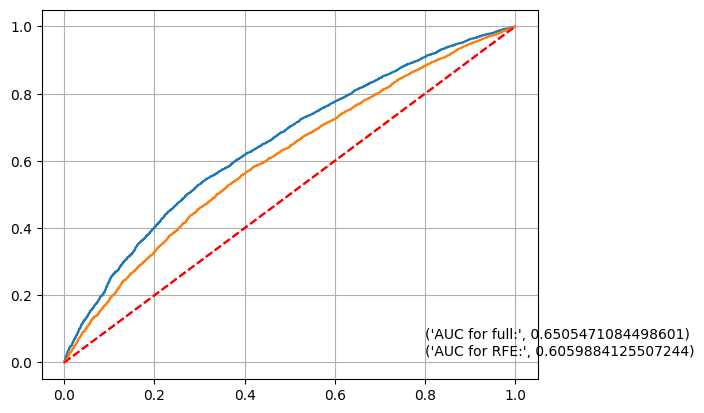

In [178]:
#RFE Model Performance

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim=([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.plot([0,1], [0,1], 'r--')
plt.text(x=0.8, y=0.07, s=('AUC for full:', metrics.roc_auc_score(y_test, y_pred_prob)))
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_prob_rfe)
plt.plot(fpr1, tpr1)
plt.xlim=([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.plot([0,1], [0,1], 'r--')
plt.text(x=0.8, y=0.02, s=('AUC for RFE:', metrics.roc_auc_score(y_test, y_pred_prob_rfe)))
plt.grid(True)

In [179]:
#Coefficients

df_odds= df_odds.reset_index()
head=df_odds.head()
head

index        Odds
0           Maximum Open Credit 3340.737132
1                 Annual Income  330.362186
2  Purpose_Educational Expenses    6.103724
3             Purpose_Buy a Car    4.349939
4               Purpose_wedding    4.132313

In [180]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [181]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'p': [1, 2],  # Minkowski distance parameter (1: Manhattan, 2: Euclidean)
    'metric': ['minkowski', 'chebyshev']  # Distance metric
    
}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the DecisionTreeClassifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
knn_grid = GridSearchCV(estimator = knn_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
knn_grid_model = knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', knn_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1} 



In [182]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
knn_model = KNeighborsClassifier(n_neighbors = knn_grid_model.best_params_.get('n_neighbors'), 
                                  p = knn_grid_model.best_params_.get('p'),
                                  metric = knn_grid_model.best_params_.get('metric'))

# use fit() to fit the model on the train set
knn_model = knn_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(knn_model, X_test))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.38      0.55      0.45      4114
           1       0.79      0.65      0.71     10570

    accuracy                           0.62     14684
   macro avg       0.58      0.60      0.58     14684
weighted avg       0.67      0.62      0.64     14684



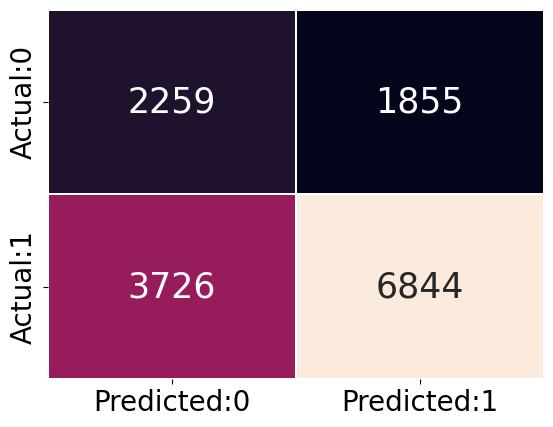

In [183]:
#Confusion matrix for KNN Model

plot_confusion_matrix(knn_model, test_data = X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

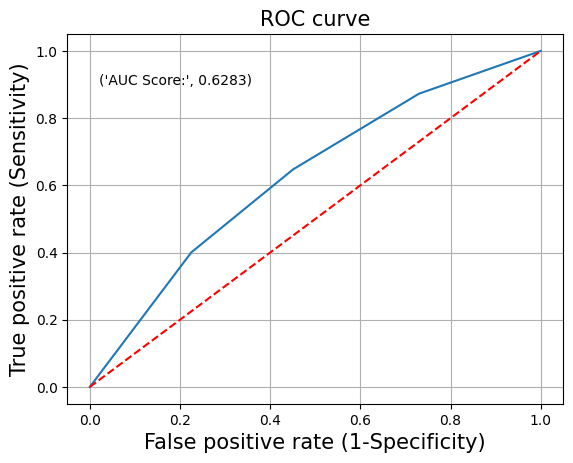

In [185]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model, test_data = X_test)

In [213]:
update_score_card(algorithm_name='KNN', model= knn_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349

In [187]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

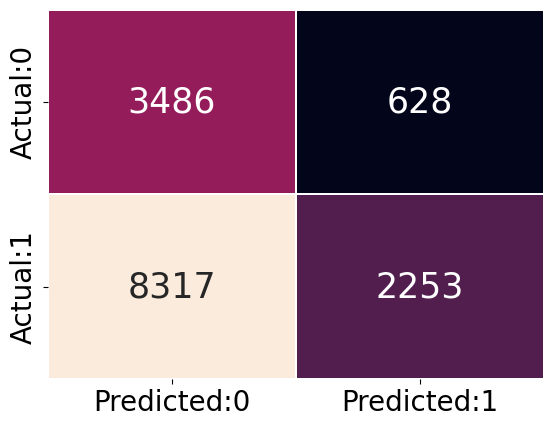

In [188]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(gnb_model, test_data=X_test)

In [189]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gaussian naive bayes model to the function
test_report = get_test_report(gnb_model, test_data=X_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.30      0.85      0.44      4114
           1       0.78      0.21      0.33     10570

    accuracy                           0.39     14684
   macro avg       0.54      0.53      0.39     14684
weighted avg       0.65      0.39      0.36     14684



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

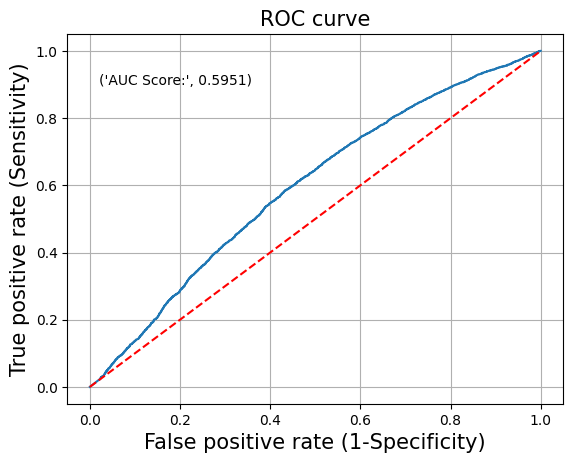

In [190]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(gnb_model, test_data=X_test)

In [214]:
update_score_card(algorithm_name='GNB', model= gnb_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349
1       GNB       0.438022      0.334994  0.390834     0.363859   0.595082

In [192]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

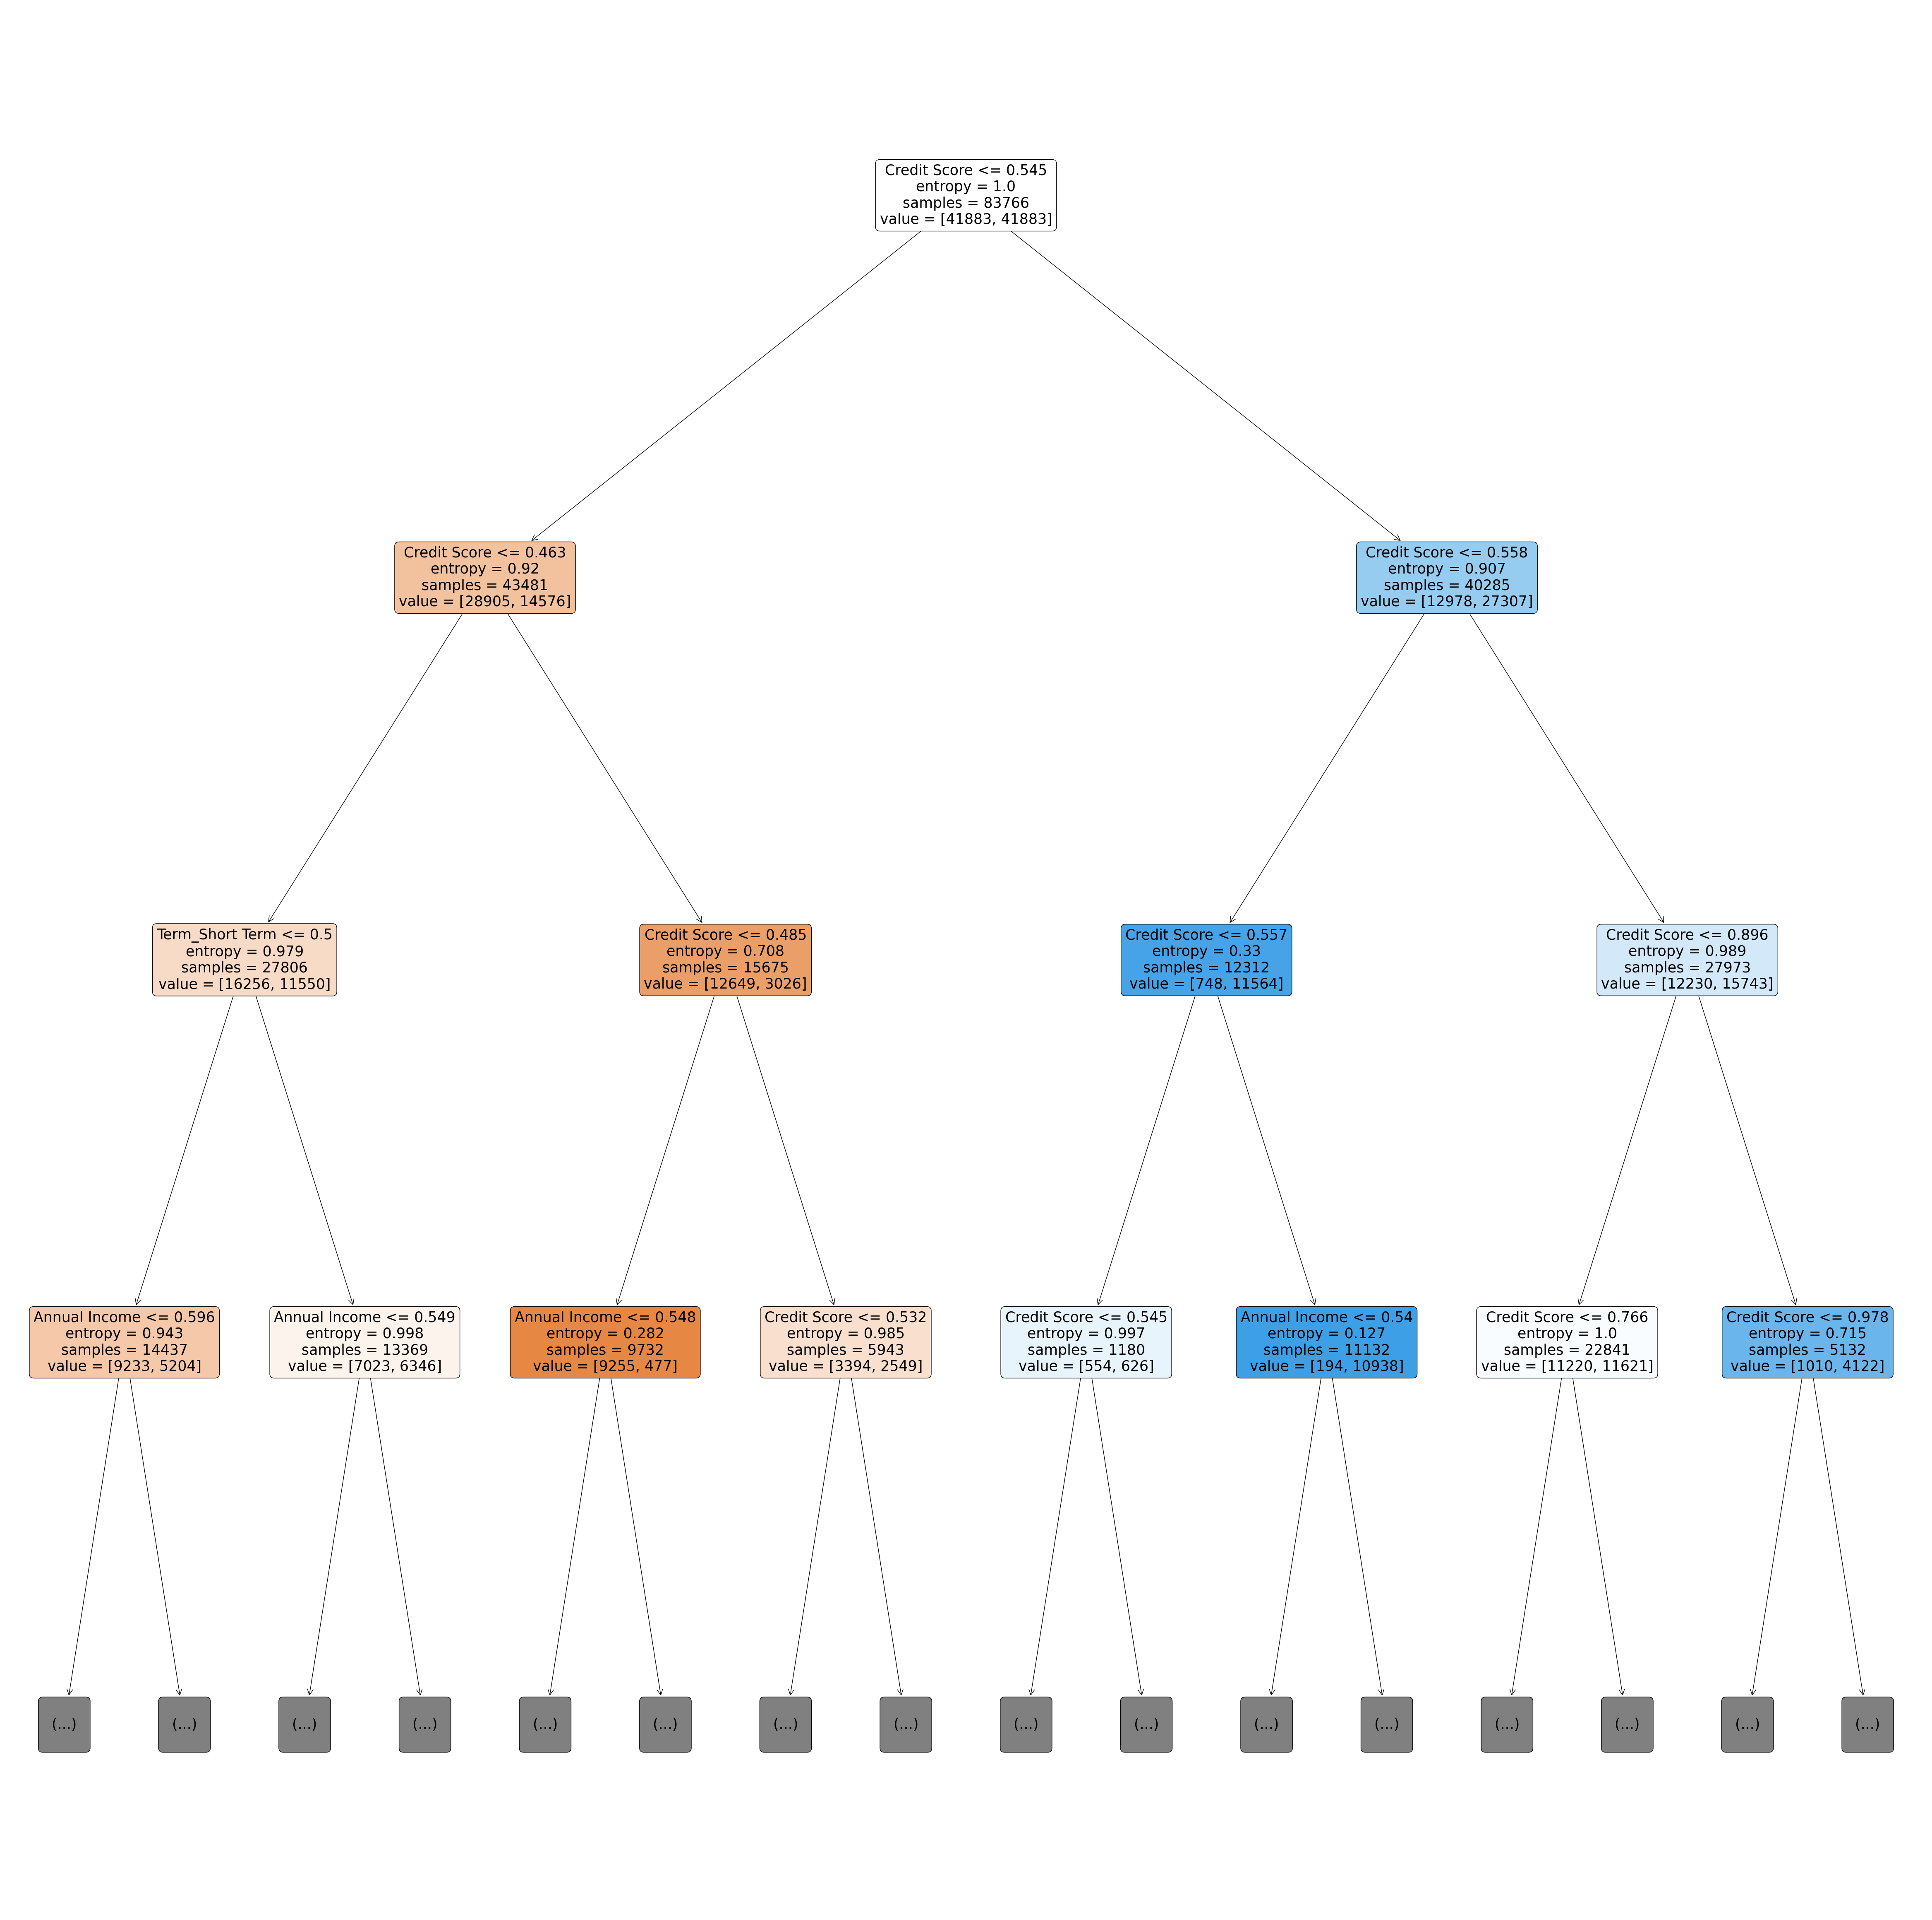

In [193]:
fig, ax = plt.subplots(figsize=(60, 60))  # Adjust figure size as needed
tree.plot_tree(decision_tree,max_depth=3,feature_names=X_train.columns,rounded=True,fontsize=25, ax=ax, filled= True)

plt.show()


In [194]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree, X_test)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.46      0.52      0.49      4114
           1       0.80      0.77      0.78     10570

    accuracy                           0.70     14684
   macro avg       0.63      0.64      0.64     14684
weighted avg       0.71      0.70      0.70     14684



In [195]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5],
                     'min_samples_leaf': [1, 5],
                     'max_leaf_nodes': [2, 5]}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the DecisionTreeClassifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
dt_grid = GridSearchCV(estimator = decision_tree_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', dt_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 



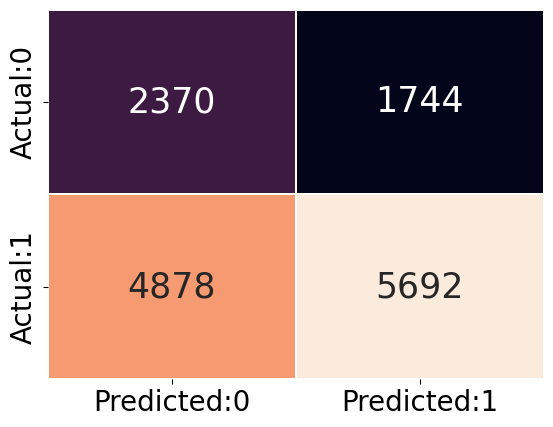

In [197]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(dt_grid_model, test_data=X_test)

In [198]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = dt_grid_model.best_params_.get('criterion'), 
                                  max_depth = dt_grid_model.best_params_.get('max_depth'),
                                  max_features = dt_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = dt_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = dt_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = dt_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(dt_model, X_test))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.33      0.58      0.42      4114
           1       0.77      0.54      0.63     10570

    accuracy                           0.55     14684
   macro avg       0.55      0.56      0.52     14684
weighted avg       0.64      0.55      0.57     14684



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

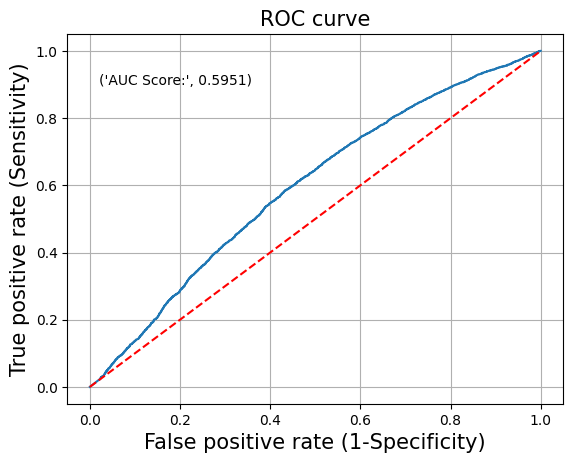

In [199]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(gnb_model, test_data=X_test)

In [215]:
update_score_card(algorithm_name='DT', model= dt_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349
1       GNB       0.438022      0.334994  0.390834     0.363859   0.595082
2        DT       0.417180      0.632234  0.549033     0.571982   0.584713

# RANDOM FOREST

In [201]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [202]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model, X_test)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.45      0.63      0.53      4114
           1       0.83      0.70      0.76     10570

    accuracy                           0.68     14684
   macro avg       0.64      0.67      0.64     14684
weighted avg       0.72      0.68      0.70     14684



In [204]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50],
                     
                     'max_features': ['sqrt', 'log2']}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50} 



In [209]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for train set:\n', get_test_report(rf_model, X_test))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.49      0.57      0.53      4114
           1       0.82      0.77      0.79     10570

    accuracy                           0.71     14684
   macro avg       0.66      0.67      0.66     14684
weighted avg       0.73      0.71      0.72     14684



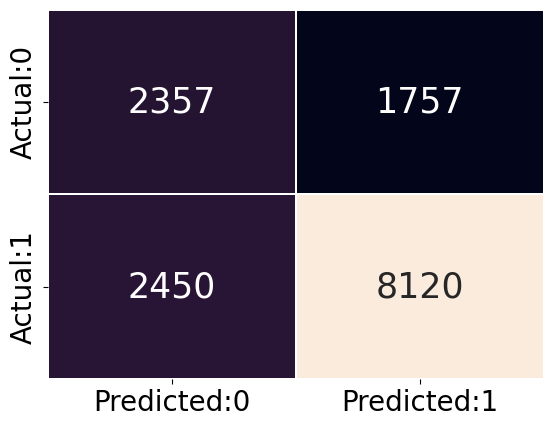

In [210]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(rf_model, test_data=X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

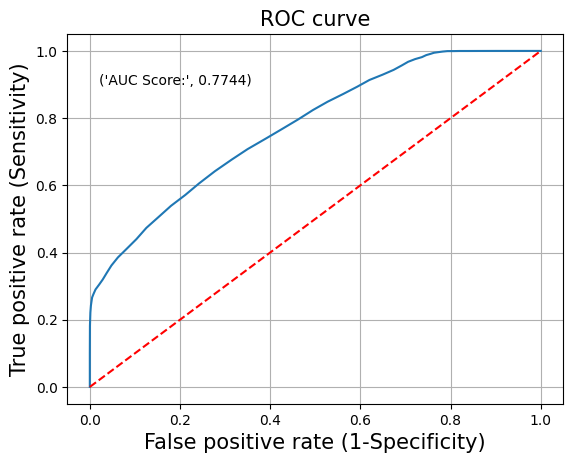

In [211]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(rf_model, test_data=X_test)

In [216]:
update_score_card(algorithm_name='RF', model= rf_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349
1       GNB       0.438022      0.334994  0.390834     0.363859   0.595082
2        DT       0.417180      0.632234  0.549033     0.571982   0.584713
3        RF       0.528416      0.794249  0.713498     0.719771   0.774370

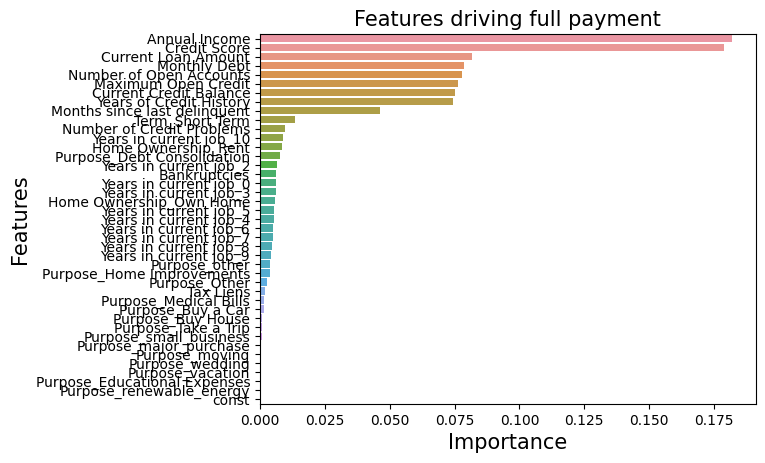

In [217]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Features driving full payment', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

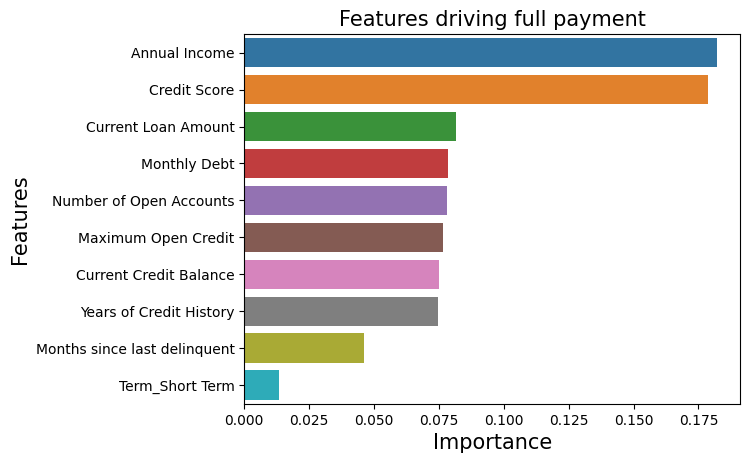

In [218]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False).head(10)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Features driving full payment', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [219]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [220]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(ada_model, X_test)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.44      0.70      0.54      4114
           1       0.85      0.65      0.74     10570

    accuracy                           0.67     14684
   macro avg       0.64      0.68      0.64     14684
weighted avg       0.73      0.67      0.68     14684



In [221]:
tuning_parameters = {"n_estimators": [10, 50, 100],  # Number of weak learners
    "learning_rate": [0.1, 1.0]  # Learning rate for each weak learner
    }

# instantiate the 'XGBClassifier' 
ada_model = AdaBoostClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
ada_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ADABoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for ADABoost classifier:  {'learning_rate': 1.0, 'n_estimators': 100} 



In [222]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
ada_model = AdaBoostClassifier(learning_rate = ada_grid.best_params_.get('learning_rate'), 
                                  n_estimators = ada_grid.best_params_.get('n_estimators'))

# use fit() to fit the model on the train set
ada_model = ada_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for train set:\n', get_test_report(ada_model, X_test))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.45      0.68      0.54      4114
           1       0.85      0.68      0.76     10570

    accuracy                           0.68     14684
   macro avg       0.65      0.68      0.65     14684
weighted avg       0.74      0.68      0.70     14684



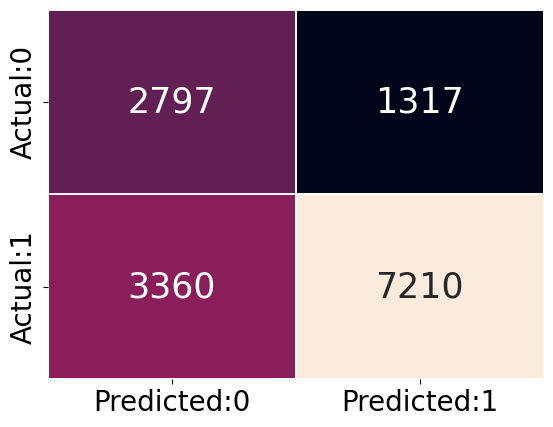

In [223]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(ada_model, test_data=X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

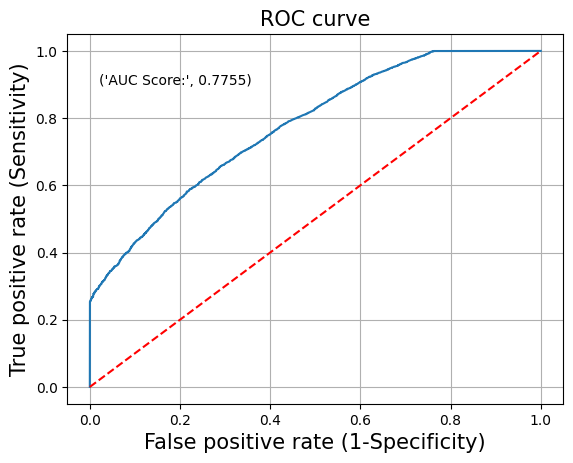

In [224]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(ada_model, test_data=X_test)

In [225]:
update_score_card(algorithm_name='Ada', model= ada_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349
1       GNB       0.438022      0.334994  0.390834     0.363859   0.595082
2        DT       0.417180      0.632234  0.549033     0.571982   0.584713
3        RF       0.528416      0.794249  0.713498     0.719771   0.774370
4       Ada       0.544640      0.755092  0.681490     0.696130   0.775471

In [226]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=10)

In [227]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(gboost_model, X_test)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.59      0.45      0.51      4114
           1       0.80      0.88      0.84     10570

    accuracy                           0.76     14684
   macro avg       0.70      0.66      0.68     14684
weighted avg       0.74      0.76      0.75     14684



In [228]:
tuning_parameters = {
    'n_estimators':[10, 50, 100],  # Number of boosting stages
    'learning_rate':[0.1, 1.0]  # Learning rate for each stage
    
}
# instantiate the 'XGBClassifier' 
gb_model = GradientBoostingClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
gb_grid = GridSearchCV(estimator = gb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
gb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ADABoost classifier: ', gb_grid.best_params_, '\n')

Best parameters for ADABoost classifier:  {'learning_rate': 1.0, 'n_estimators': 100} 



tuning_parameters = {
    'n_estimators':[10, 50, 100],  # Number of boosting stages
    'learning_rate':[0.1, 1.0],  # Learning rate for each stage
    'max_depth':[3, 5, 7],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}
# instantiate the 'XGBClassifier' 
gb_model = GradientBoostingClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
gb_grid = GridSearchCV(estimator = gb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
gb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ADABoost classifier: ', gb_grid.best_params_, '\n')

In [229]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
gb_model = GradientBoostingClassifier(learning_rate = gb_grid.best_params_.get('learning_rate'), 
                                  n_estimators = gb_grid.best_params_.get('n_estimators'))
# use fit() to fit the model on the train set
gb_model = gb_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for train set:\n', get_test_report(gb_model, X_test))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.63      0.41      0.49      4114
           1       0.80      0.91      0.85     10570

    accuracy                           0.77     14684
   macro avg       0.71      0.66      0.67     14684
weighted avg       0.75      0.77      0.75     14684



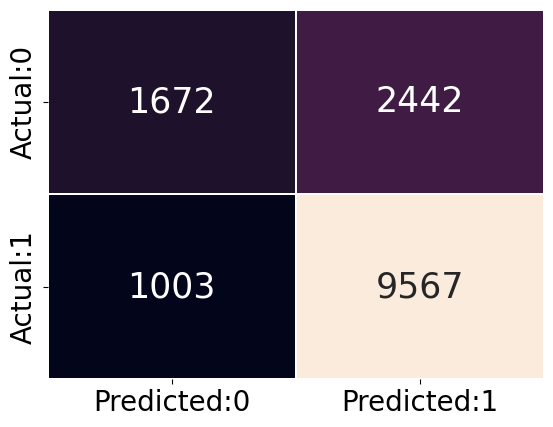

In [230]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(gb_model, test_data=X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

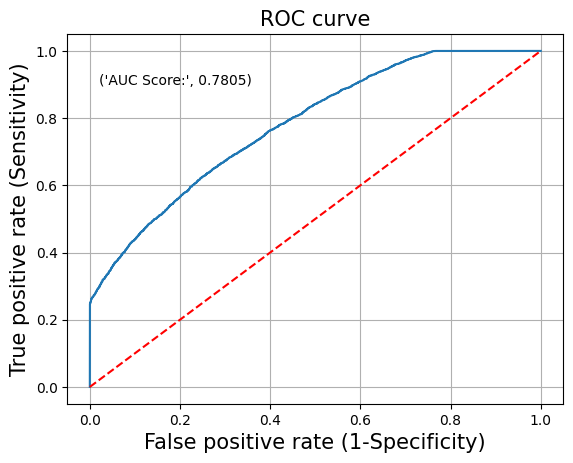

In [231]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(gb_model, test_data=X_test)

In [232]:
update_score_card(algorithm_name='GB', model= gb_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349
1       GNB       0.438022      0.334994  0.390834     0.363859   0.595082
2        DT       0.417180      0.632234  0.549033     0.571982   0.584713
3        RF       0.528416      0.794249  0.713498     0.719771   0.774370
4       Ada       0.544640      0.755092  0.681490     0.696130   0.775471
5        GB       0.492561      0.847425  0.765391     0.748003   0.780539

In [233]:
from xgboost import XGBClassifier
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [234]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(xgb_model, X_test)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.54      0.47      0.50      4114
           1       0.80      0.85      0.82     10570

    accuracy                           0.74     14684
   macro avg       0.67      0.66      0.66     14684
weighted avg       0.73      0.74      0.73     14684



In [235]:
tuning_parameters = {
    'n_estimators':[10, 50, 100],  # Number of boosting stages
    'learning_rate':[0.1, 1.0],  # Learning rate for each stage
    'gamma': [0, 0.5, 1.0],  # Minimum loss reduction required to make a split
    
}
# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ADABoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for ADABoost classifier:  {'gamma': 0.5, 'learning_rate': 0.1, 'n_estimators': 100} 



In [236]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
xgb_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'), 
                                  n_estimators = xgb_grid.best_params_.get('n_estimators'), 
                                  gamma = xgb_grid.best_params_.get('gamma'))
# use fit() to fit the model on the train set
xgb_model = xgb_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for train set:\n', get_test_report(xgb_model, X_test))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52      4114
           1       0.81      0.85      0.83     10570

    accuracy                           0.75     14684
   macro avg       0.68      0.67      0.67     14684
weighted avg       0.74      0.75      0.74     14684



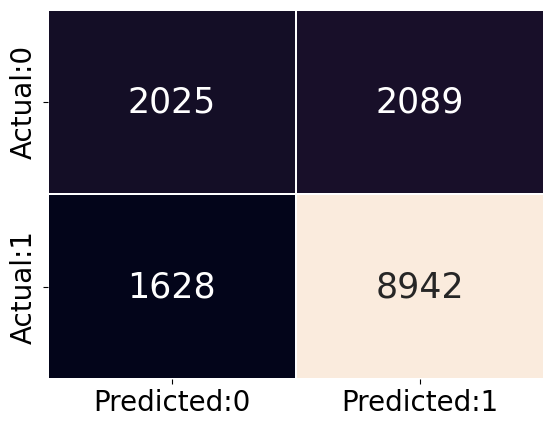

In [237]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(xgb_model, test_data=X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

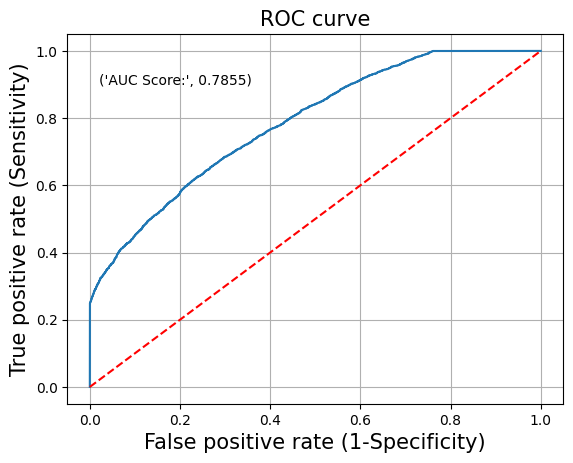

In [238]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(xgb_model, test_data=X_test)

In [239]:
update_score_card(algorithm_name='XGB', model= xgb_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349
1       GNB       0.438022      0.334994  0.390834     0.363859   0.595082
2        DT       0.417180      0.632234  0.549033     0.571982   0.584713
3        RF       0.528416      0.794249  0.713498     0.719771   0.774370
4       Ada       0.544640      0.755092  0.681490     0.696130   0.775471
5        GB       0.492561      0.847425  0.765391     0.748003   0.780539
6       XGB       0.521437      0.827925  0.746867     0.742056   0.785501

In [241]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion='entropy', max_features= 'log2', n_estimators= 50)),
                 ('KNN_model', KNeighborsClassifier(metric= 'minkowski',n_neighbors= 3, p= 1)),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_features='log2',
                                                       n_estimators=50)),
                               ('KNN_model',
                                KNeighborsClassifier(n_neighbors=3, p=1)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [242]:
print('Classification Report for train set:\n', get_test_report(stack_model, X_test))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49      4114
           1       0.80      0.80      0.80     10570

    accuracy                           0.71     14684
   macro avg       0.65      0.65      0.65     14684
weighted avg       0.71      0.71      0.71     14684



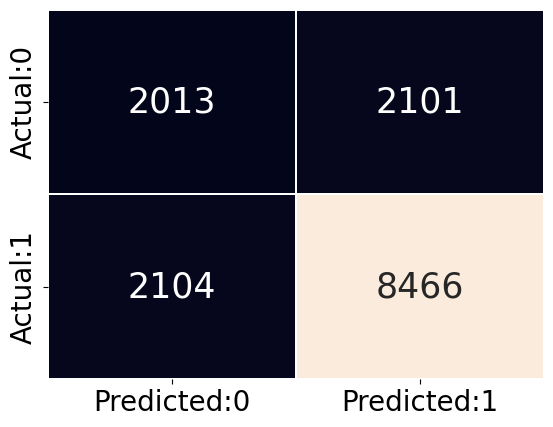

In [243]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(stack_model, test_data=X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

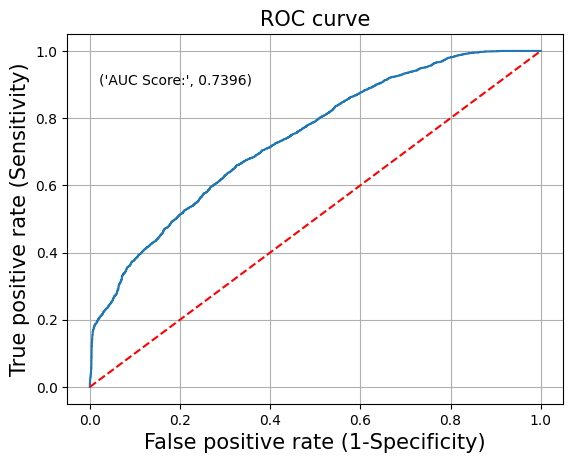

In [244]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(stack_model, test_data=X_test)

In [245]:
update_score_card(algorithm_name='Stack', model= stack_model, test_data =X_test, y_test= y_test)


classification_score_card

<IPython.core.display.Javascript object>

Algorithm  class_zero_f1  class_one_f1  accuracy  weighted_f1  ROC Score
0       KNN       0.447371      0.710364  0.619926     0.636681   0.628349
1       GNB       0.438022      0.334994  0.390834     0.363859   0.595082
2        DT       0.417180      0.632234  0.549033     0.571982   0.584713
3        RF       0.528416      0.794249  0.713498     0.719771   0.774370
4       Ada       0.544640      0.755092  0.681490     0.696130   0.775471
5        GB       0.492561      0.847425  0.765391     0.748003   0.780539
6       XGB       0.521437      0.827925  0.746867     0.742056   0.785501
7     Stack       0.489126      0.801060  0.713634     0.713666   0.739626